### Proyecto Final Notebook 1
#### Doris Andrea Paz Garcia  	22005266
#### Franz Schubert Castillo Colocho 22003738
#### Estuardo Funes 20032042

In [1]:
#Importamos las librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats


In [37]:
#Cargamos data para aplicar analisis de datos
df = pd.read_csv("dataset_proyecto.csv")
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,yes,0,no,no,no,no,no,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,no,0,no,no,no,no,no,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,no,0,no,no,no,no,no,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,no,1,no,no,yes,yes,no,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,no,0,no,no,no,no,no,...,0.00,0,0,7.88,11,0,0,0.00,1,0


### 1. Analisis de Datos. 

In [3]:
df.dtypes  #Revisamos los tipos de datos dentro del dataset. 

bmi                    float64
Age                    float64
asa_status               int64
baseline_cancer         object
baseline_charlson        int64
baseline_cvd            object
baseline_dementia       object
baseline_diabetes       object
baseline_digestive      object
baseline_osteoart       object
baseline_psych          object
baseline_pulmonary      object
ahrq_ccs                 int64
ccsComplicationRate    float64
ccsMort30Rate          float64
complication_rsi       float64
dow                      int64
gender                   int64
hour                   float64
month                    int64
moonphase                int64
mort30                   int64
mortality_rsi          float64
race                     int64
complication             int64
dtype: object

#### 1.1 Verificamos columnas con NAN

In [4]:
df.isnull().mean() #Porcentaje de nulos

bmi                    0.002938
Age                    0.014144
asa_status             0.000000
baseline_cancer        0.000000
baseline_charlson      0.000000
baseline_cvd           0.000000
baseline_dementia      0.000000
baseline_diabetes      0.000000
baseline_digestive     0.000000
baseline_osteoart      0.000000
baseline_psych         0.000000
baseline_pulmonary     0.000000
ahrq_ccs               0.000000
ccsComplicationRate    0.000000
ccsMort30Rate          0.008473
complication_rsi       0.000000
dow                    0.000000
gender                 0.000000
hour                   0.035326
month                  0.000000
moonphase              0.000000
mort30                 0.000000
mortality_rsi          0.000000
race                   0.000000
complication           0.000000
dtype: float64

In [5]:
#Clasificamos las columnas con NAN rescatables (NAN < 5%)
porcentaje_nulos = df.isnull().mean()
columnas_filtradas = porcentaje_nulos[(porcentaje_nulos < 0.05) & (porcentaje_nulos > 0)].index.tolist()
columnas_filtradas


['bmi', 'Age', 'ccsMort30Rate', 'hour']

In [6]:
#Revisamos nuevamente el tipo de dato 
tipos_datos_filtrados = df[columnas_filtradas].dtypes
tipos_datos_filtrados

bmi              float64
Age              float64
ccsMort30Rate    float64
hour             float64
dtype: object

##### Tenemos 4 variables númericas con las cuales vamos a imputar según sea favorable (media, mediana o moda).

In [7]:
def imputar_y_comparar(df, columna):
    # Imputación de valores faltantes
    media_imputada = df[columna].fillna(df[columna].mean())
    mediana_imputada = df[columna].fillna(df[columna].median())
    moda_imputada = df[columna].fillna(df[columna].mode()[0])
    
    # Gráfico de densidad
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[columna], label='Original')
    sns.kdeplot(media_imputada, label='Media')
    sns.kdeplot(mediana_imputada, label='Mediana')
    sns.kdeplot(moda_imputada, label='Moda')
    plt.title(f'Gráfico de Densidad para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

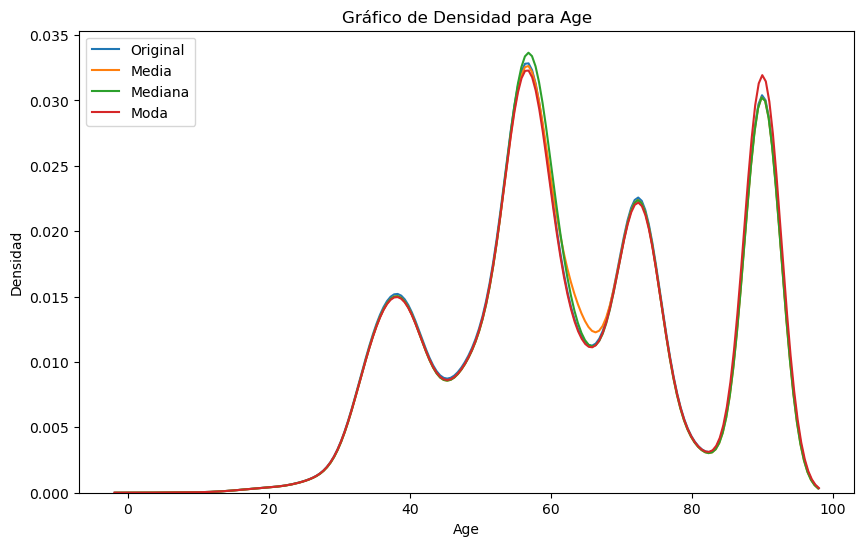

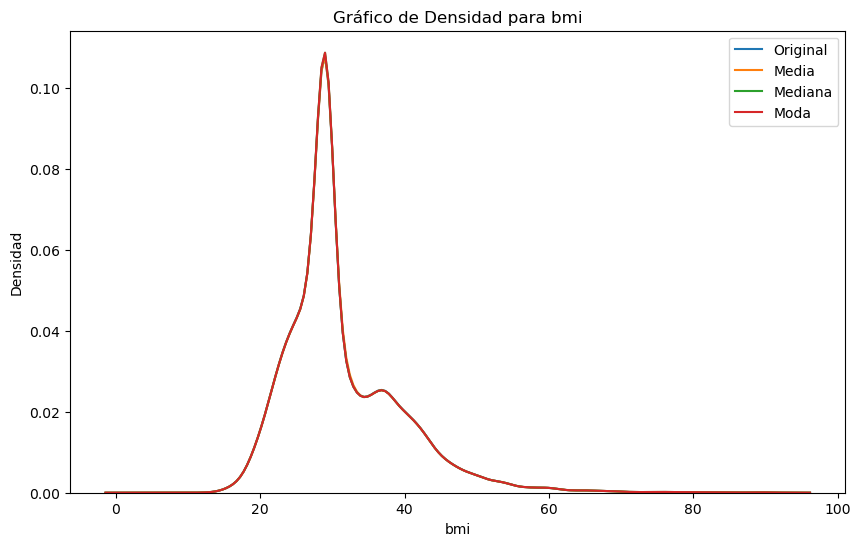

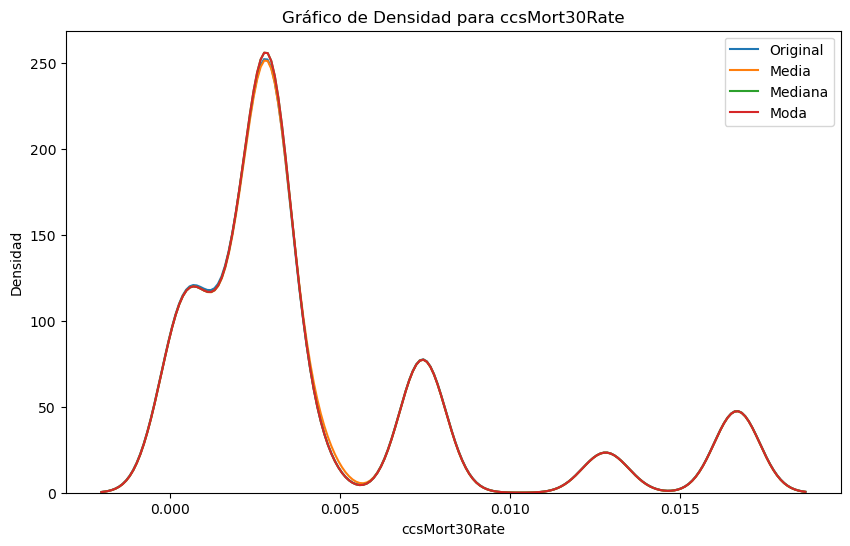

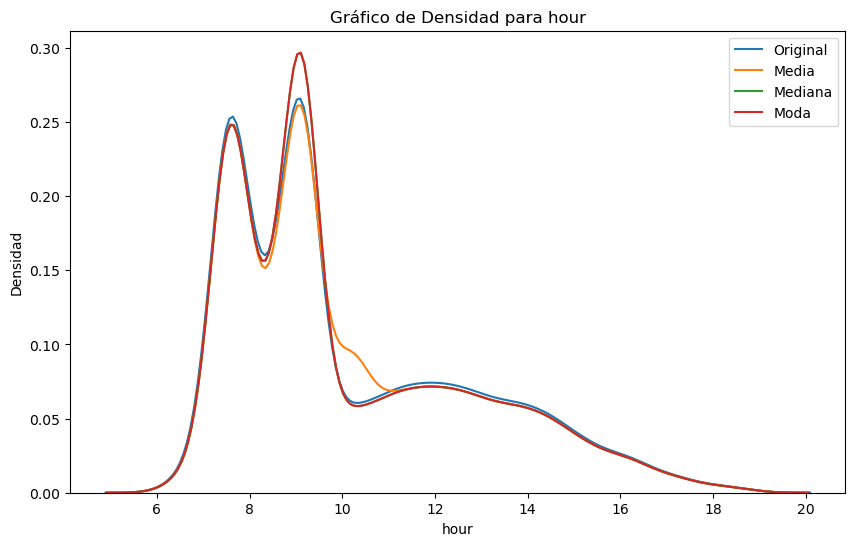

In [8]:
#Vemos graficamente que imputación se comporta similar a los datos originales. 
imputar_y_comparar(df, 'Age')
imputar_y_comparar(df, 'bmi')
imputar_y_comparar(df, 'ccsMort30Rate')
imputar_y_comparar(df, 'hour')



In [14]:
#Realizamos la imputación en función de lo observado. 
df['Age_imputada'] = df['Age'].fillna(df['Age'].mean())
df['bmi_imputada'] = df['bmi'].fillna(df['bmi'].mode()[0])
df['ccsMort30Rate_imputada'] = df['ccsMort30Rate'].fillna(df['ccsMort30Rate'].median())
df['hour_imputada'] = df['hour'].fillna(df['hour'].median())


#### 1.2 Extraer tipos de columnas númericas continuas, númericas discretas y categoricas. 

In [15]:
def getDataColTypes(df):
    categoricas=[]
    continuas=[]
    discretas=[]
    for colName in df.columns:
        if(df[colName].dtype=='O'): 
            categoricas.append(colName)
        else: 
            if((df[colName].dtype=='int64') or (df[colName].dtypes=='float64')): 
                if(len(df[colName])<=30):
                    discretas.append(colName)
                else: 
                    continuas.append(colName)
    return discretas,continuas,categoricas

In [16]:
discretas,continuas,categoricas = getDataColTypes(df)
print(continuas)
print(discretas)
print(categoricas) 


['bmi', 'Age', 'asa_status', 'baseline_charlson', 'ahrq_ccs', 'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month', 'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication', 'Age_imputada', 'bmi_imputada', 'ccsMort30Rate_imputada', 'hour_imputada']
[]
['baseline_cancer', 'baseline_cvd', 'baseline_dementia', 'baseline_diabetes', 'baseline_digestive', 'baseline_osteoart', 'baseline_psych', 'baseline_pulmonary']


In [22]:
#Contamos la cantidad de ocurrencias para analizar las variables categoricas. 
def PlotCatColumn_vrs_Complication(df,colname,complication):
    plt.figure(figsize=(10,5))
    plot=sns.countplot(x=df[colname],hue=df[complication])
    plt.title(f'{colname} vrs {complication}')
    
    for p in plot.patches: 
        plt.annotate(p.get_height(),(p.get_x()+p.get_width()/3,p.get_height()+50))
    
    plt.show()

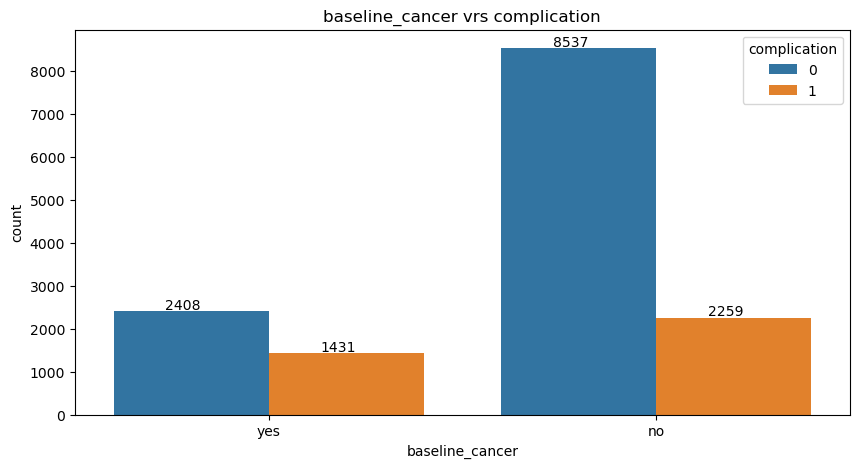

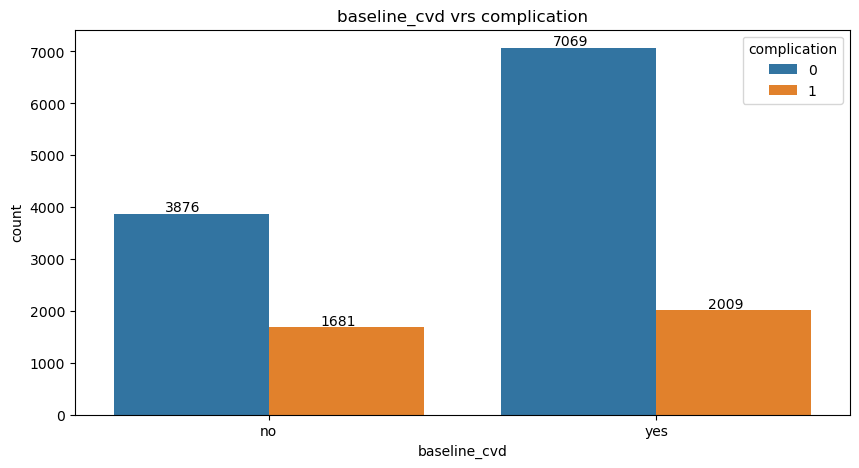

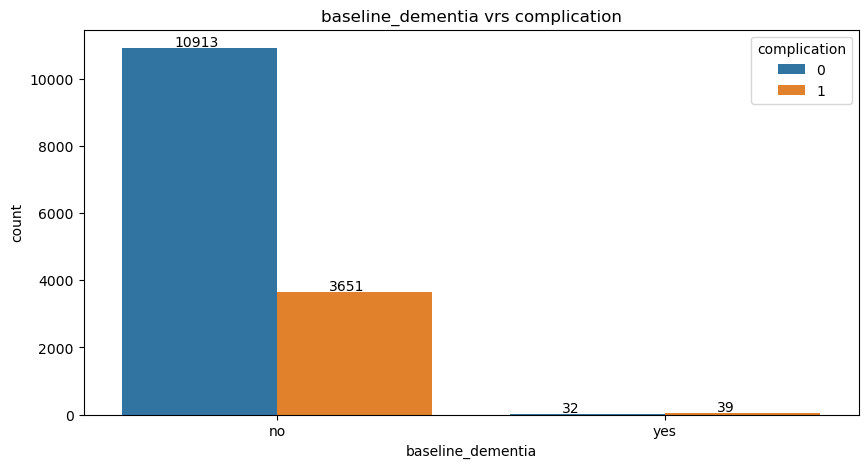

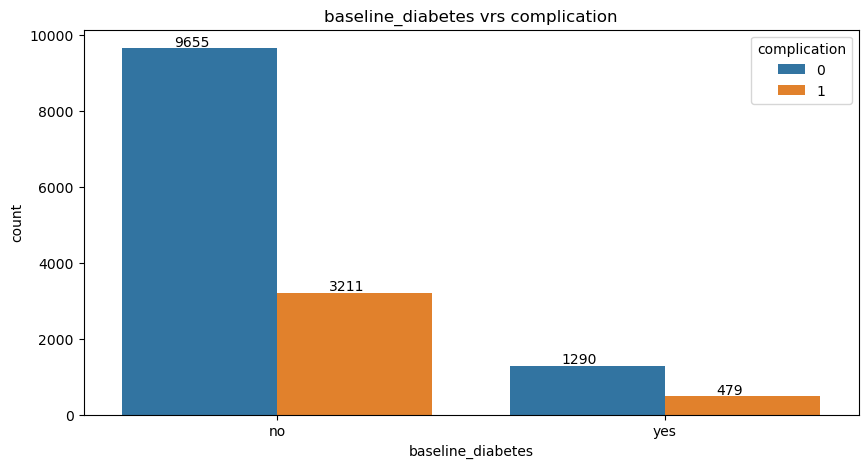

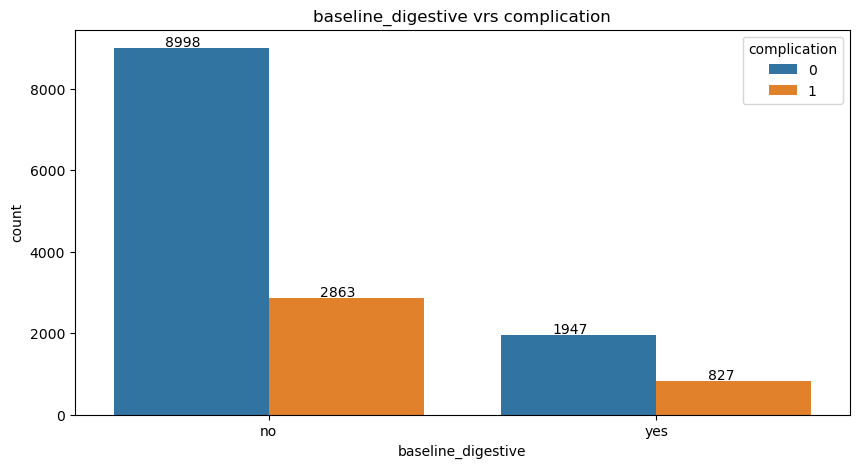

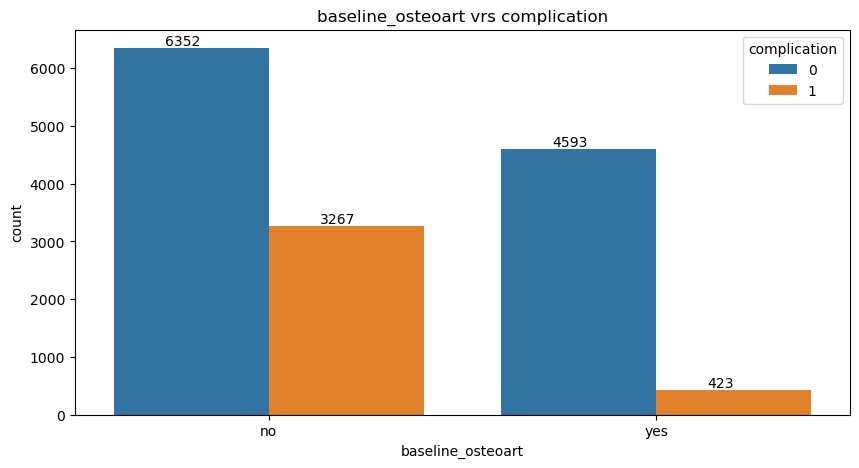

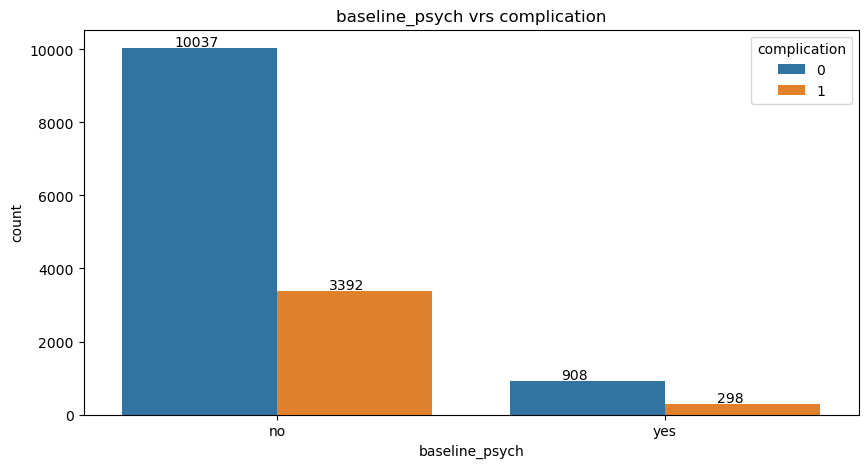

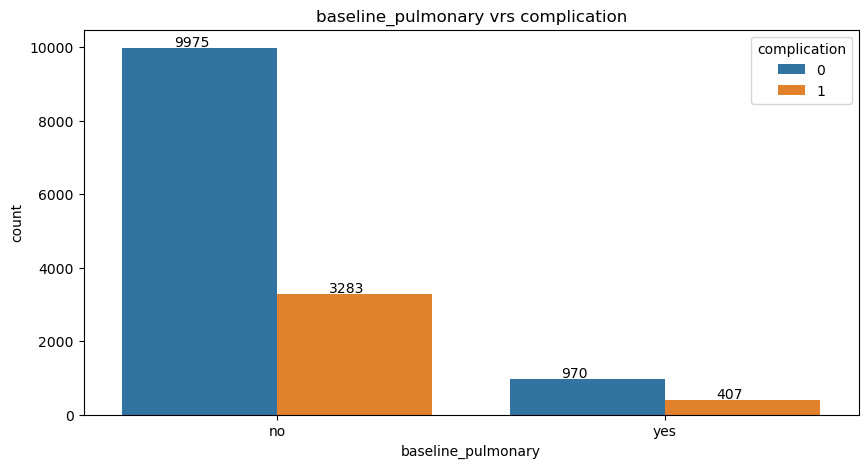

In [23]:
for catCol in categoricas: 
    PlotCatColumn_vrs_Complication(df,catCol,'complication')
#Importante: Revisar que los datos esten balanceados cuando la variable dependiente es categorica.

In [24]:
#Analizamos variables continuas y también se detectan outliers. 
dataset =df
col='Complication'
def plotDistBoxQQ(dataset,col):
    '''
    Descripción: Muestra las graficas de distribución, Boxplot y QQ-Plot para detectar outliers
    Input: dataset -> pandas dataframe, col -> string con nombre de columna. 
    Output: Visualización de plots.
    '''
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Boxplot")

C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

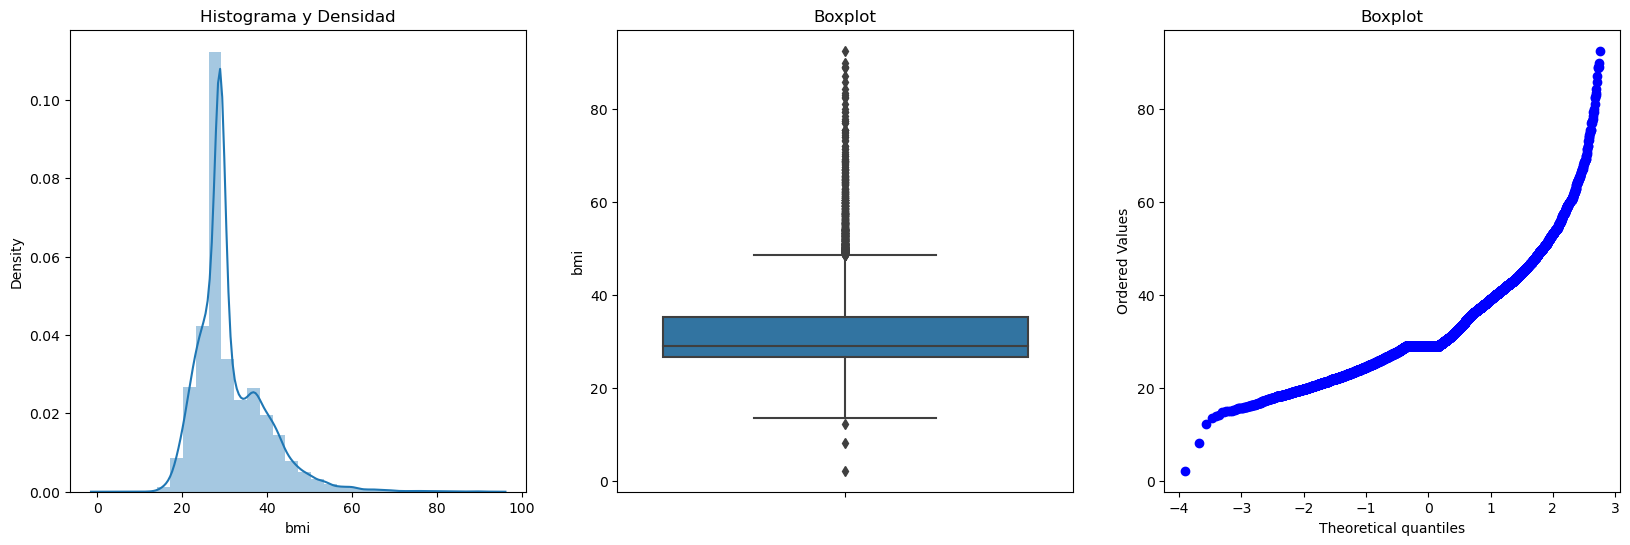

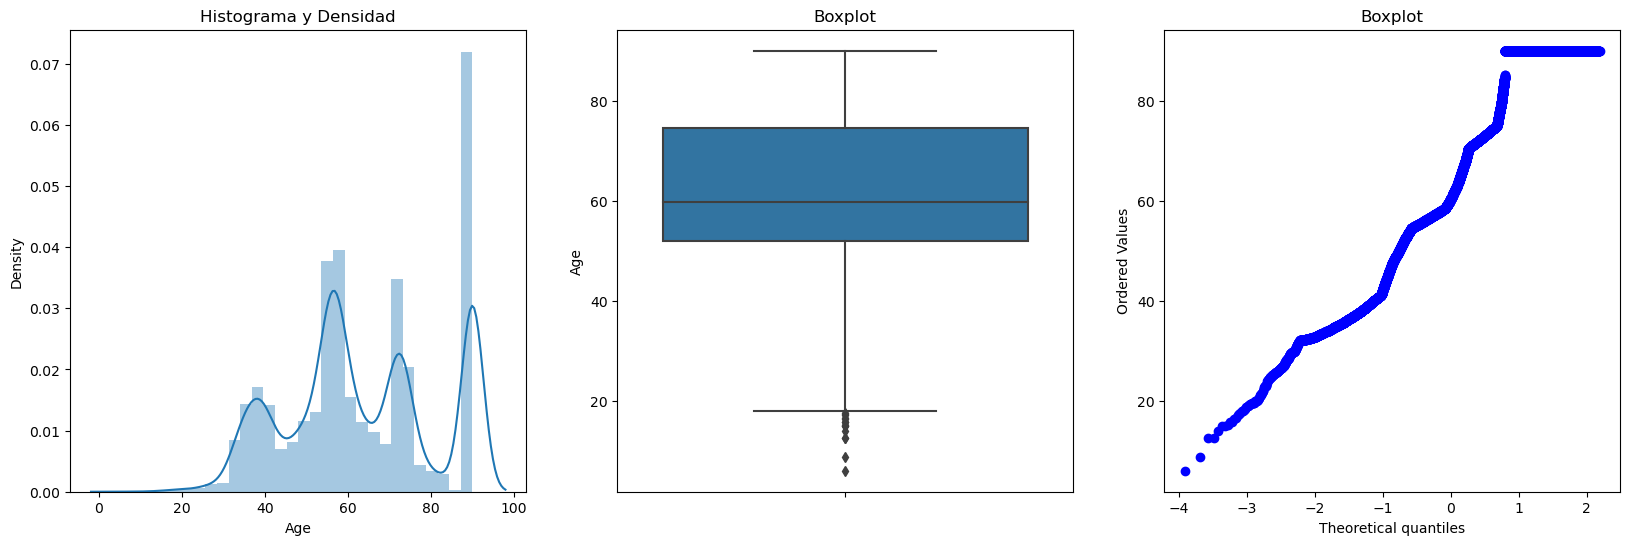

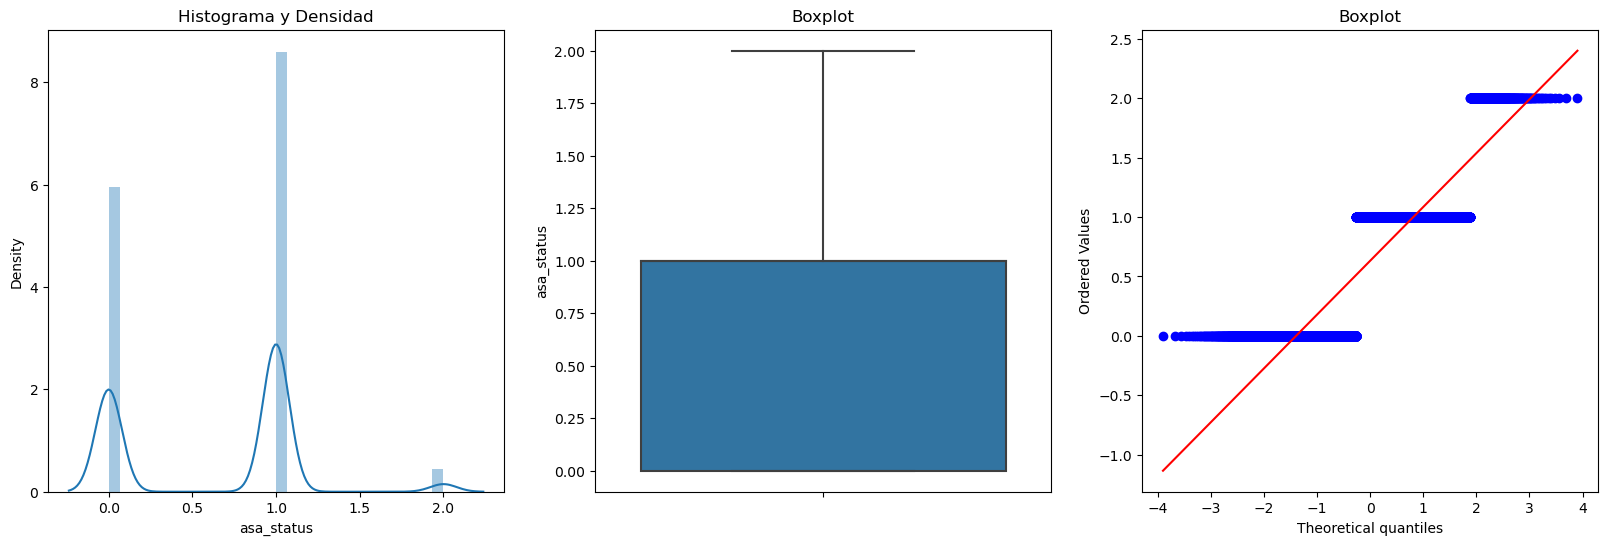

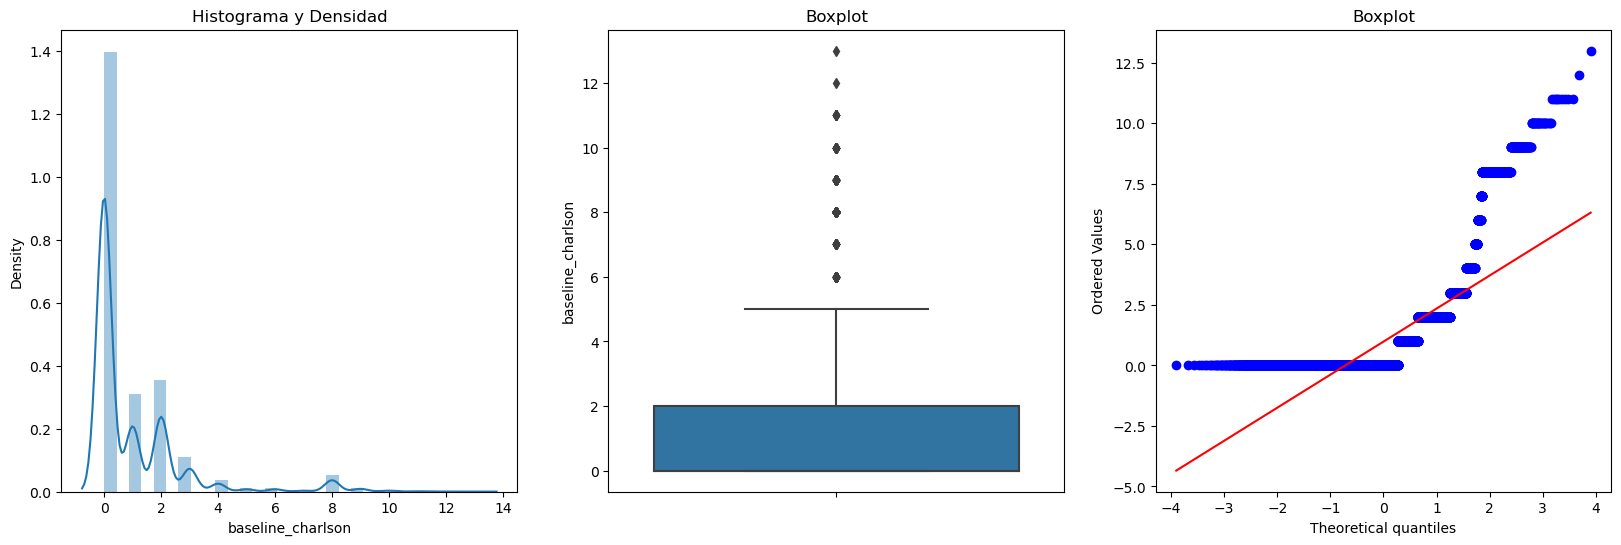

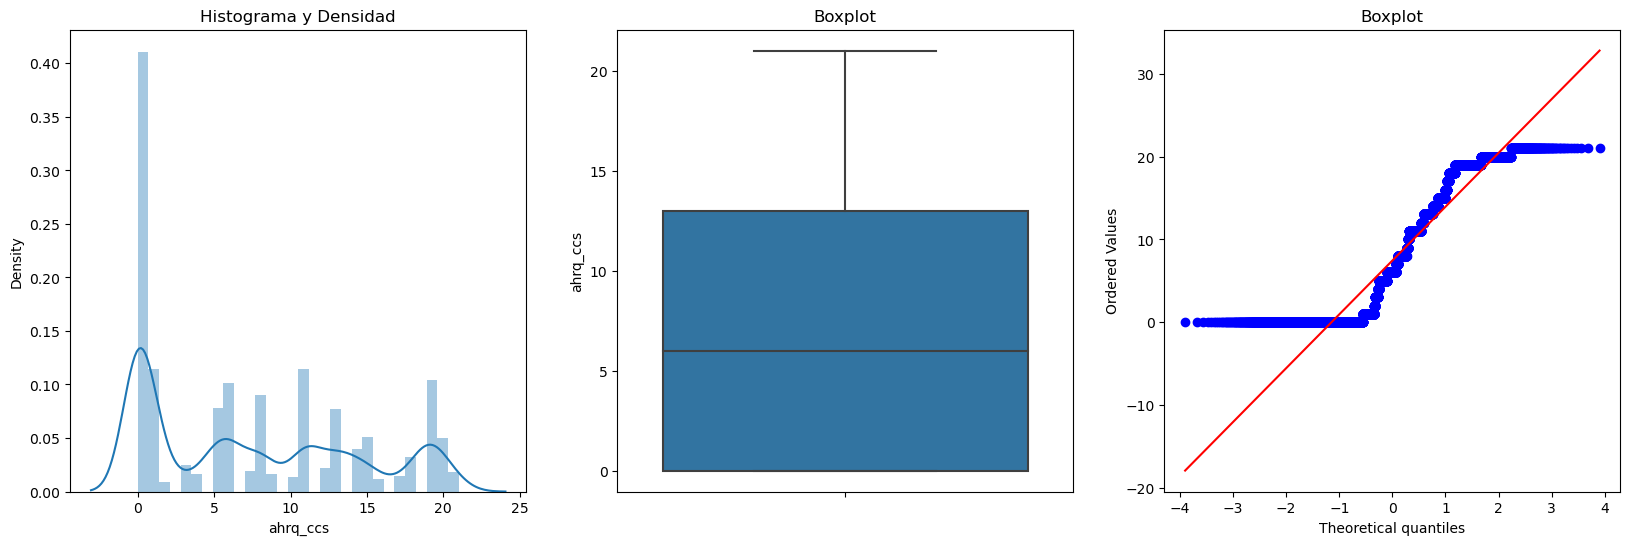

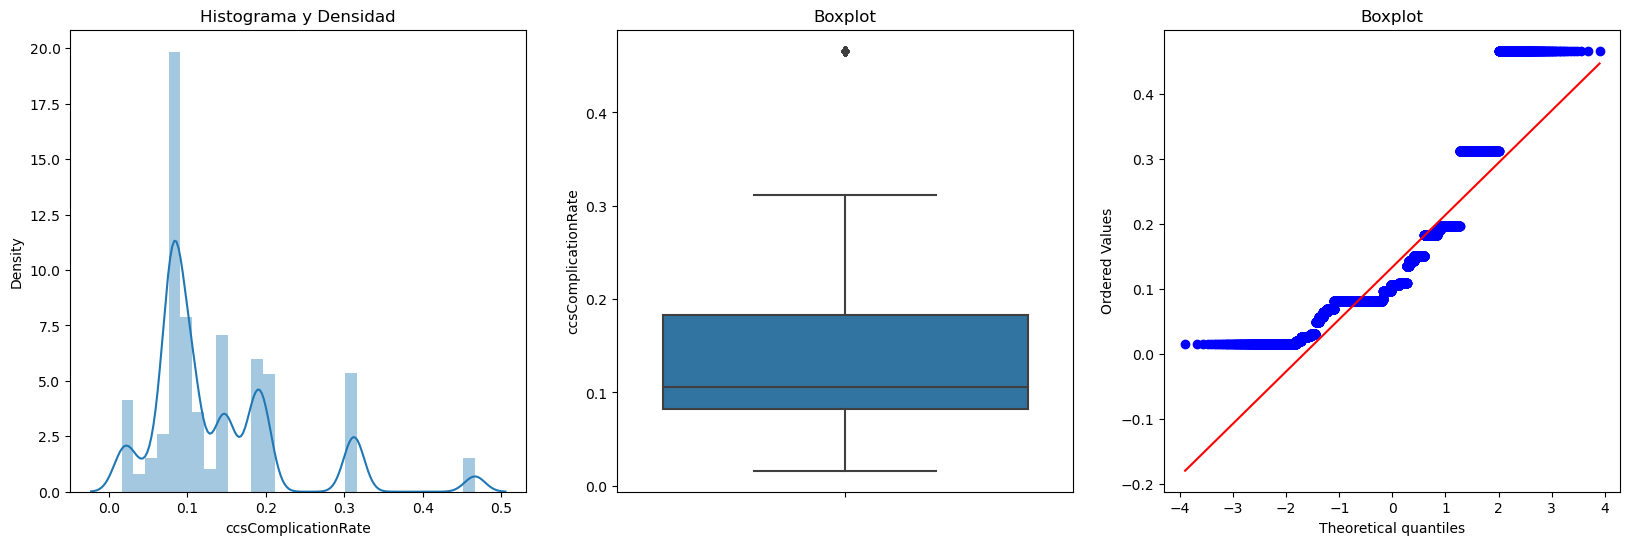

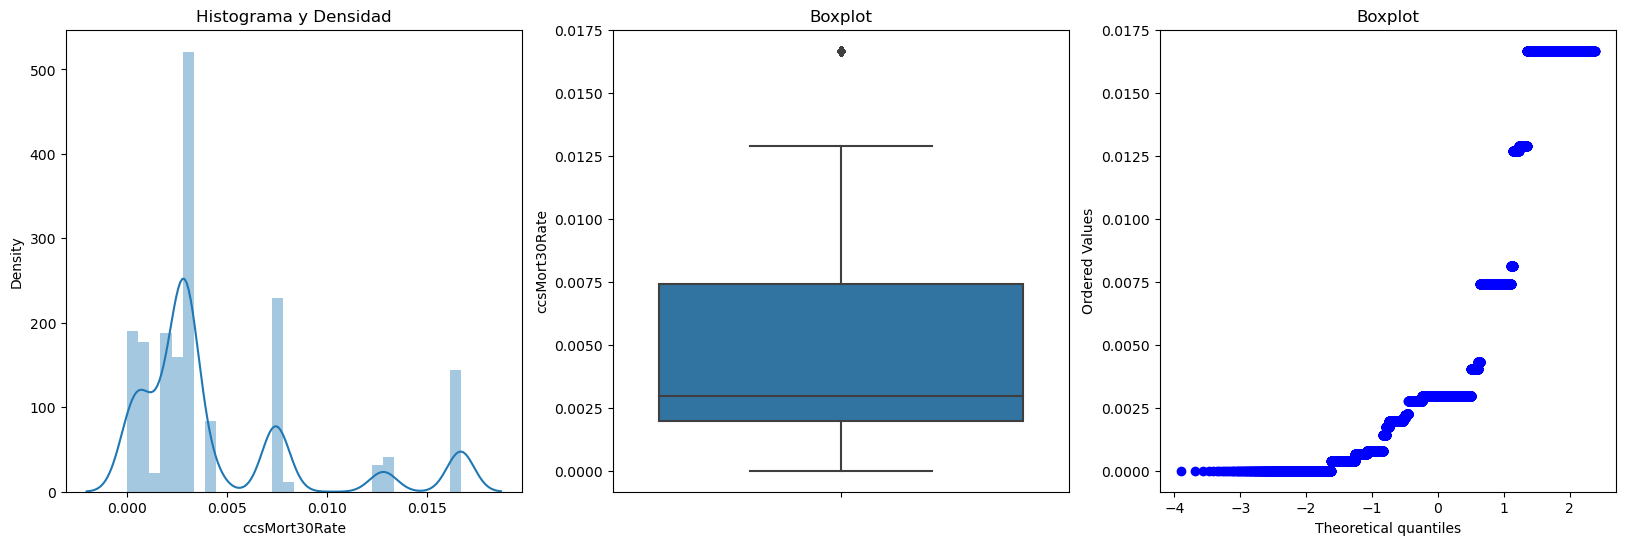

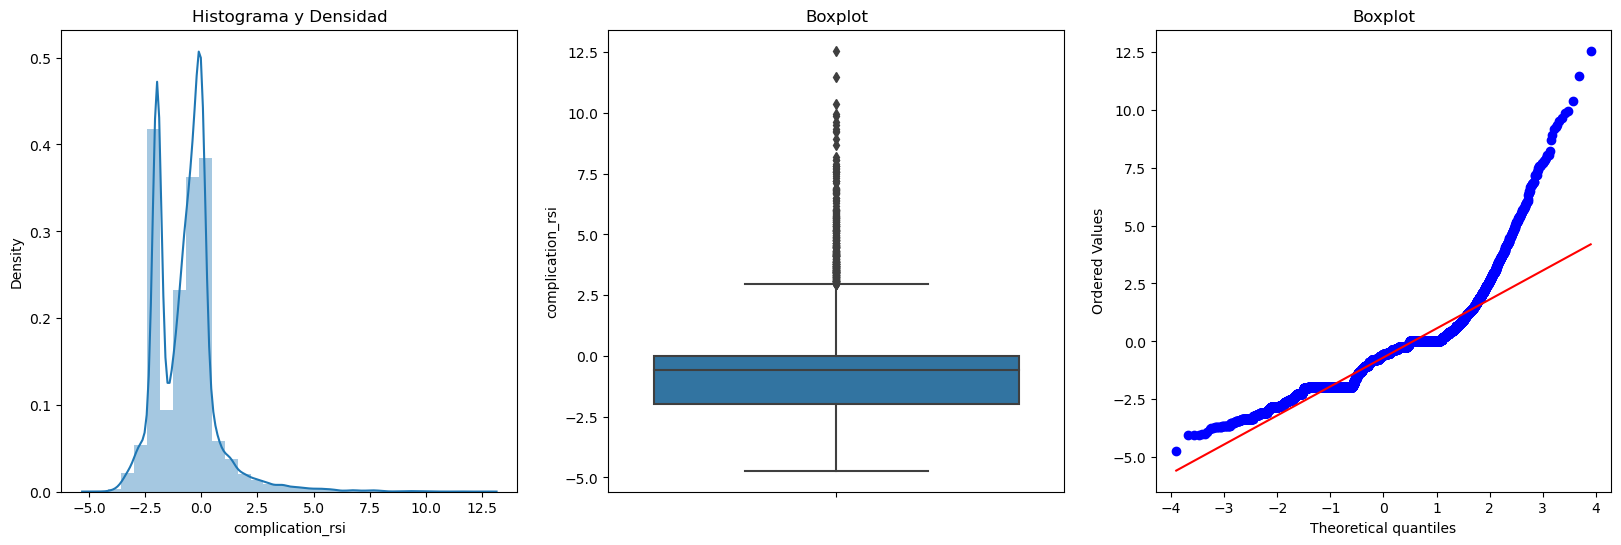

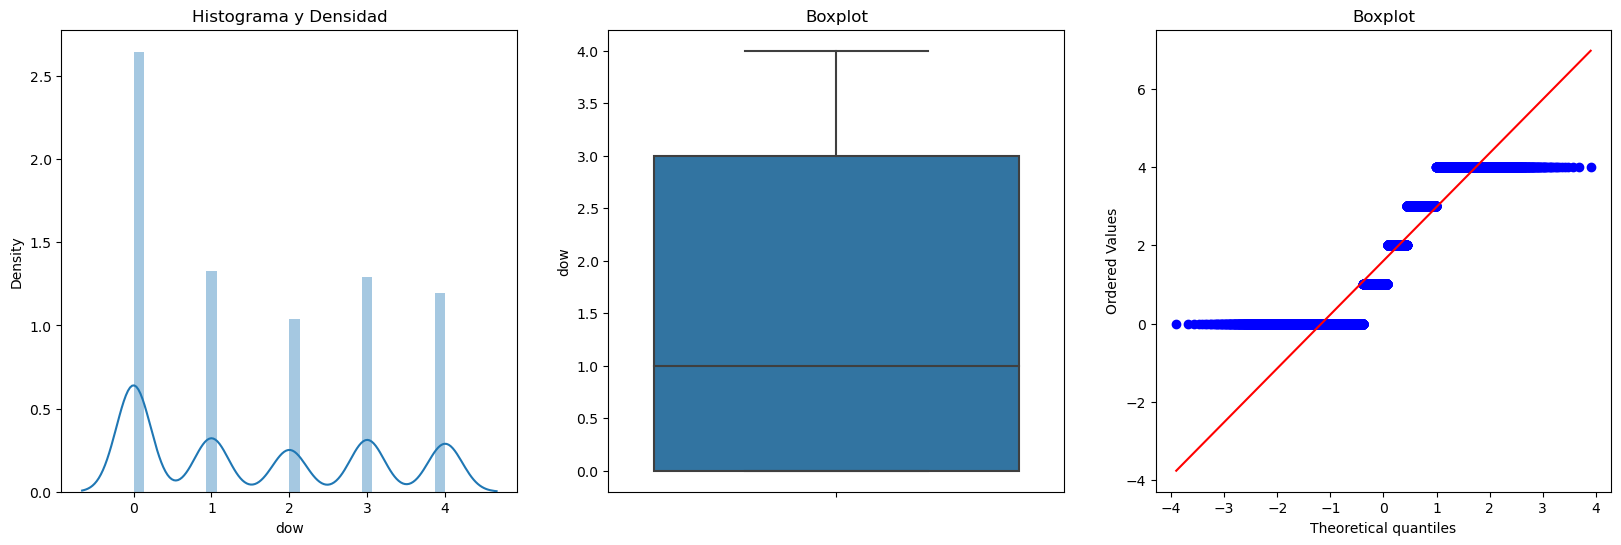

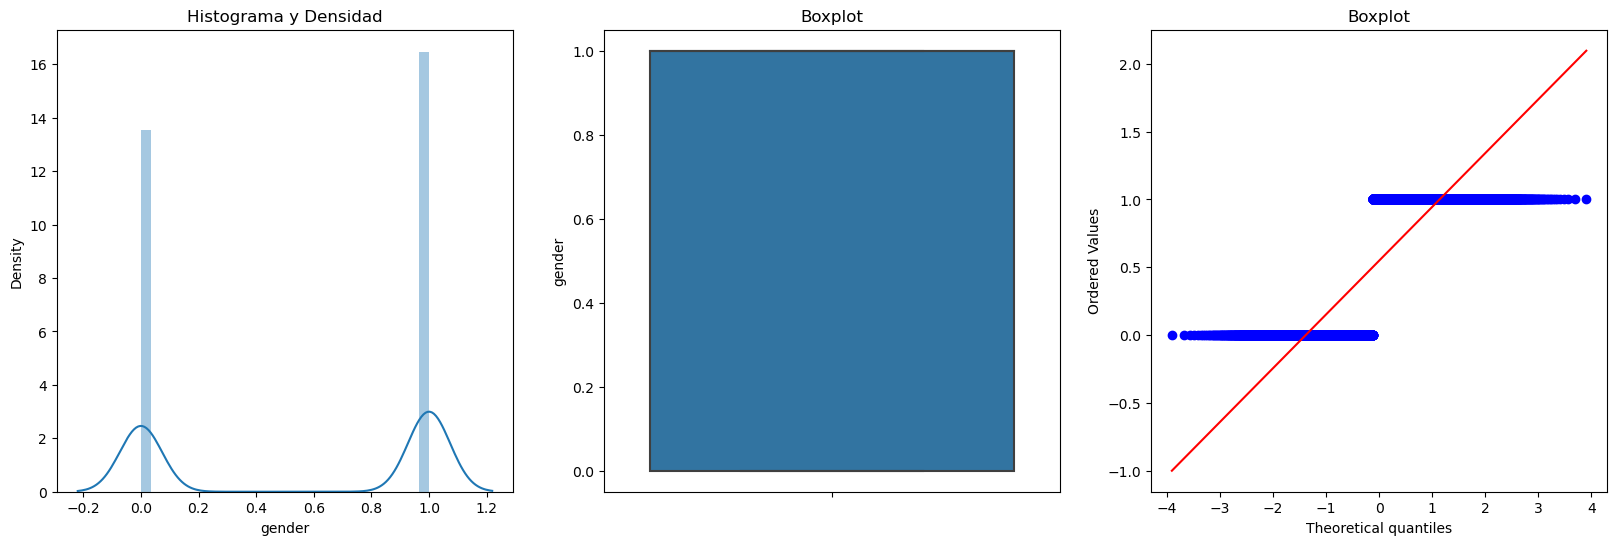

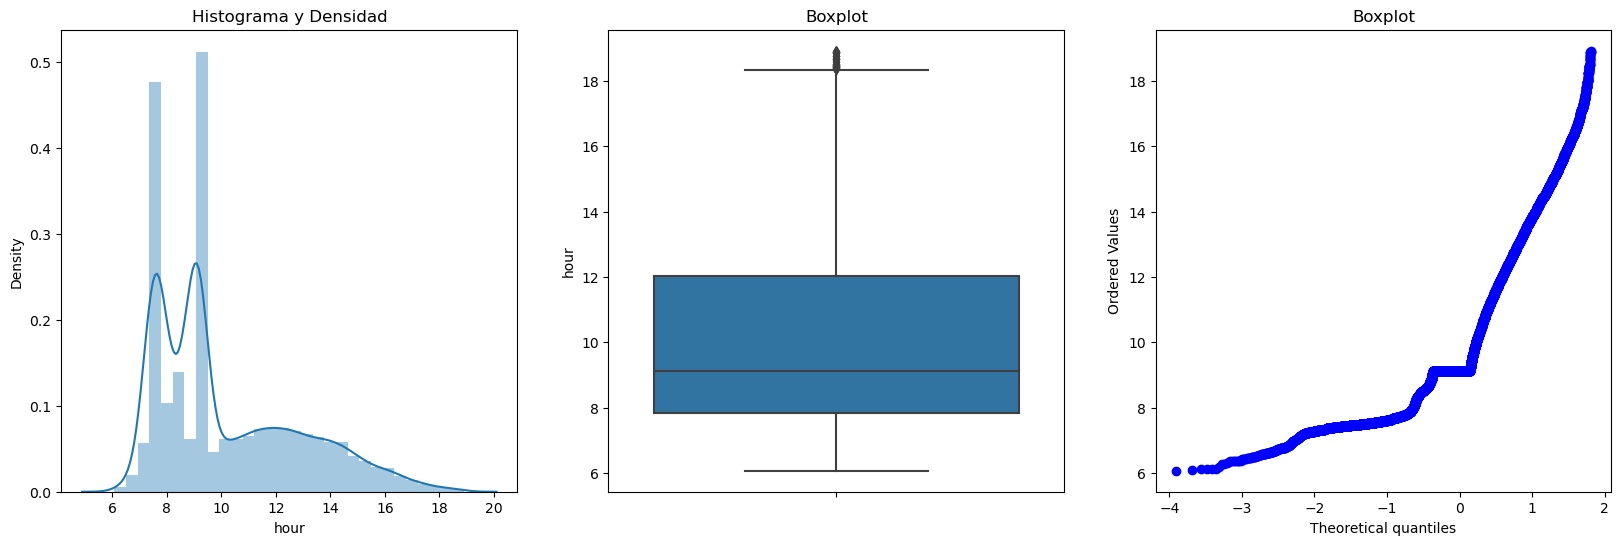

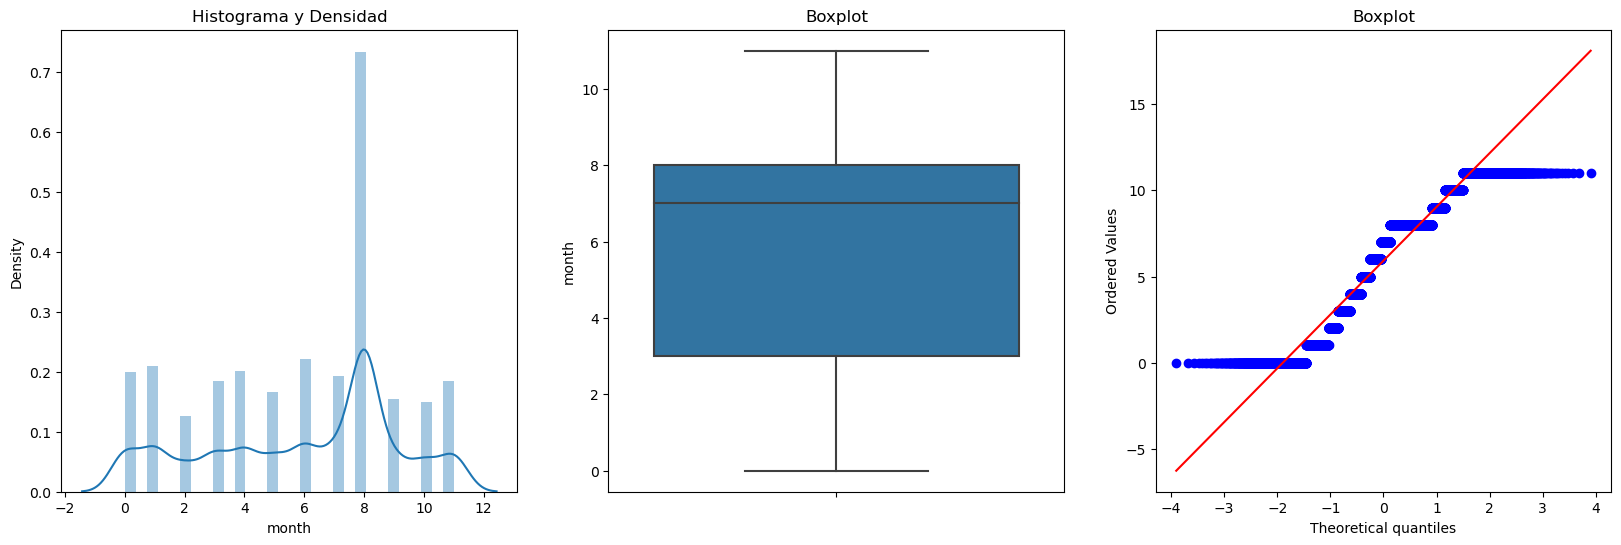

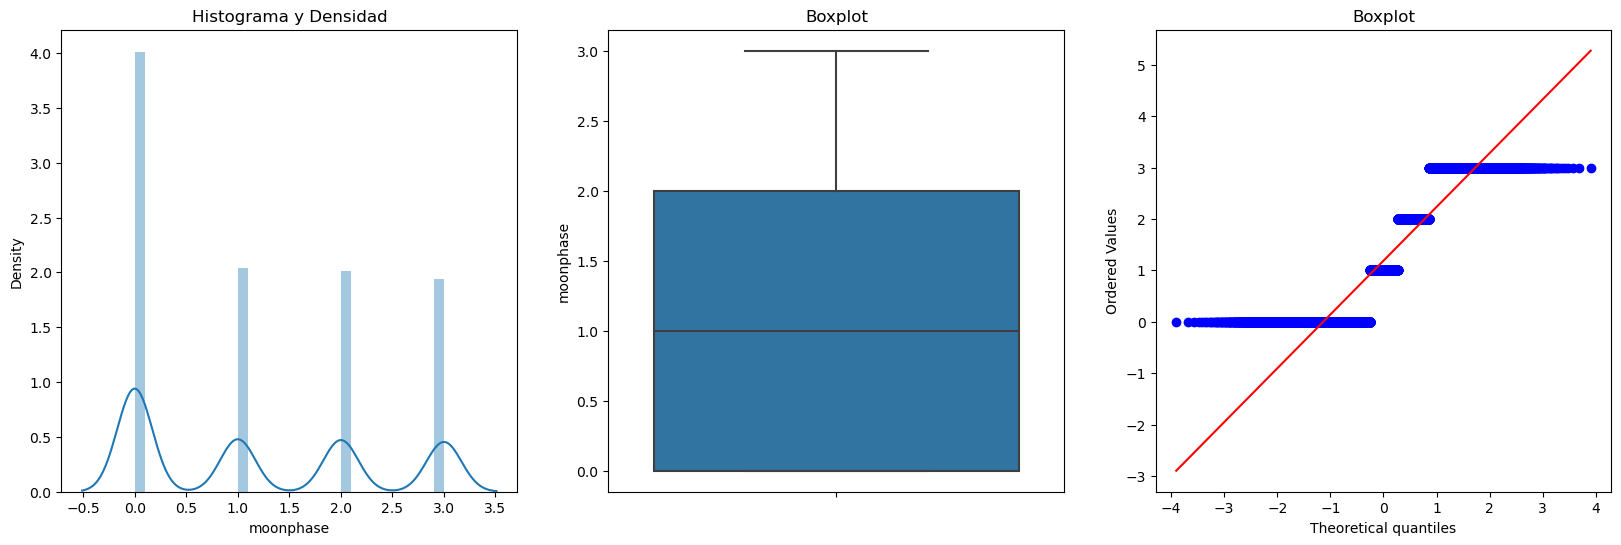

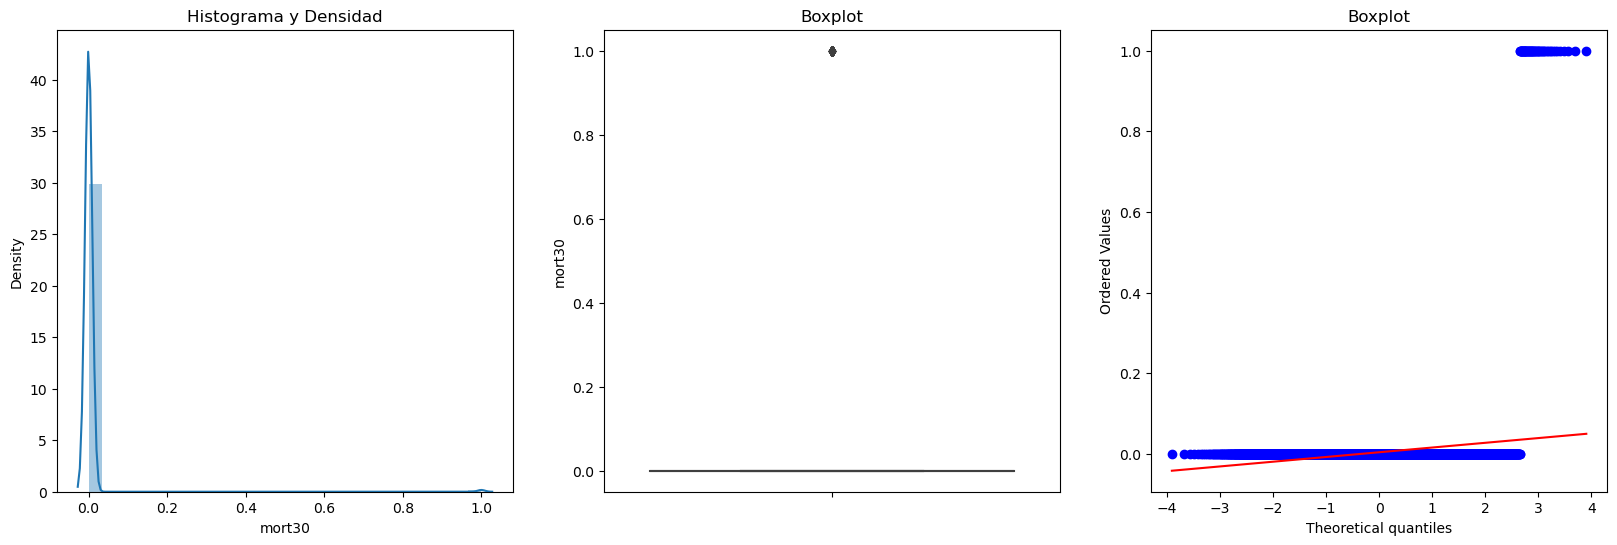

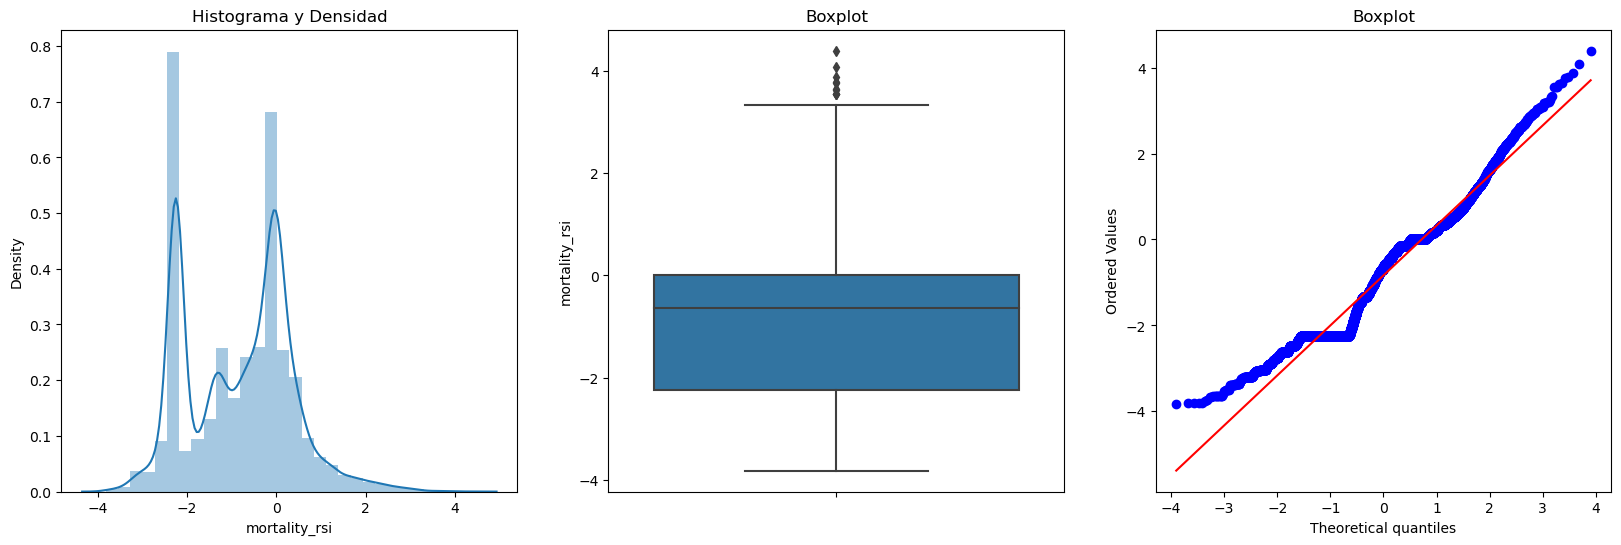

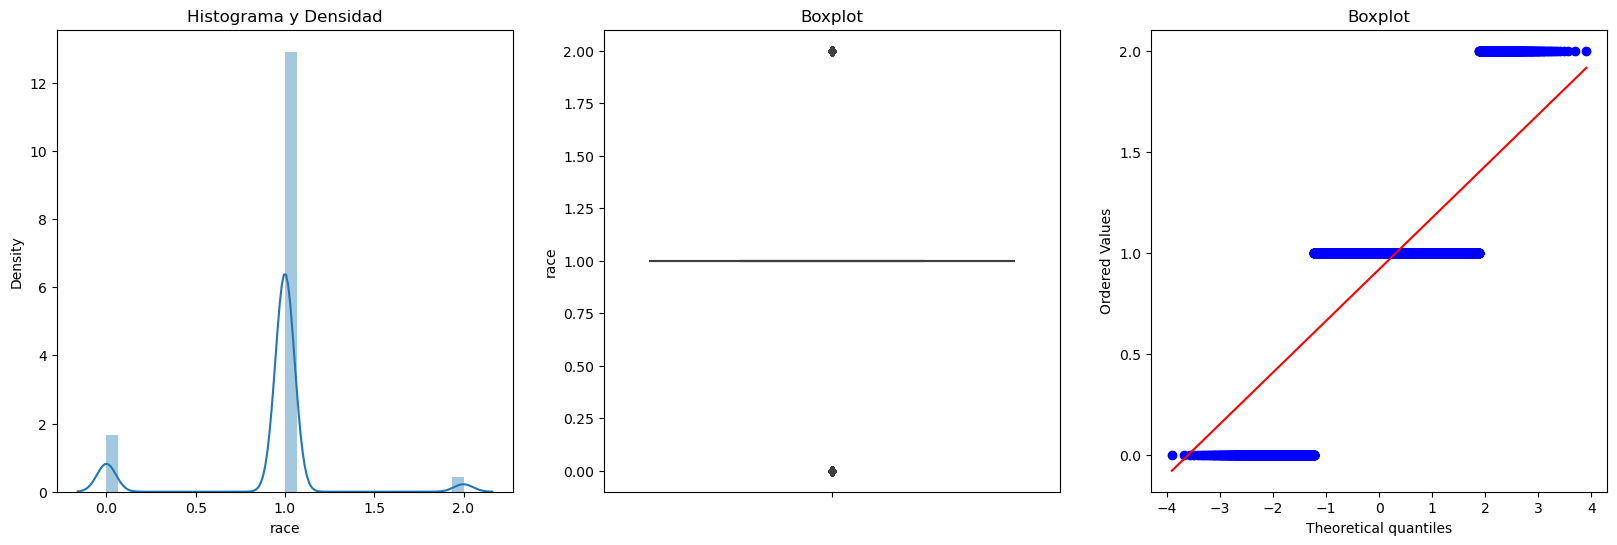

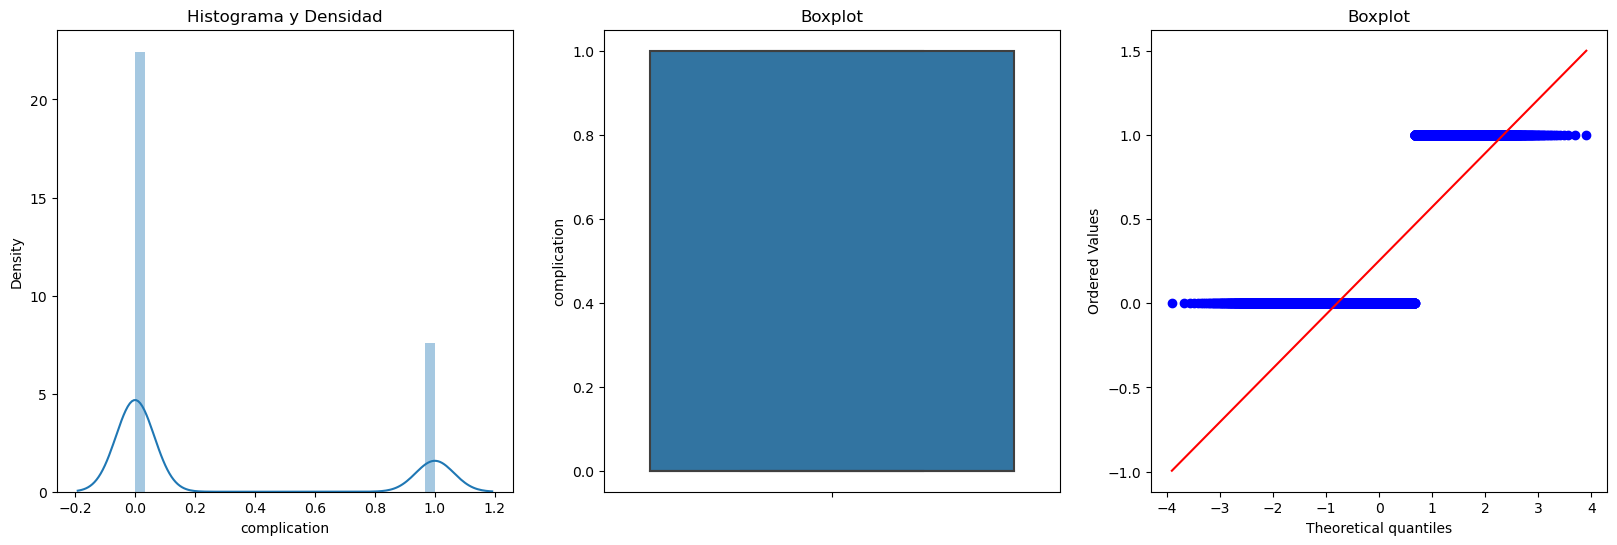

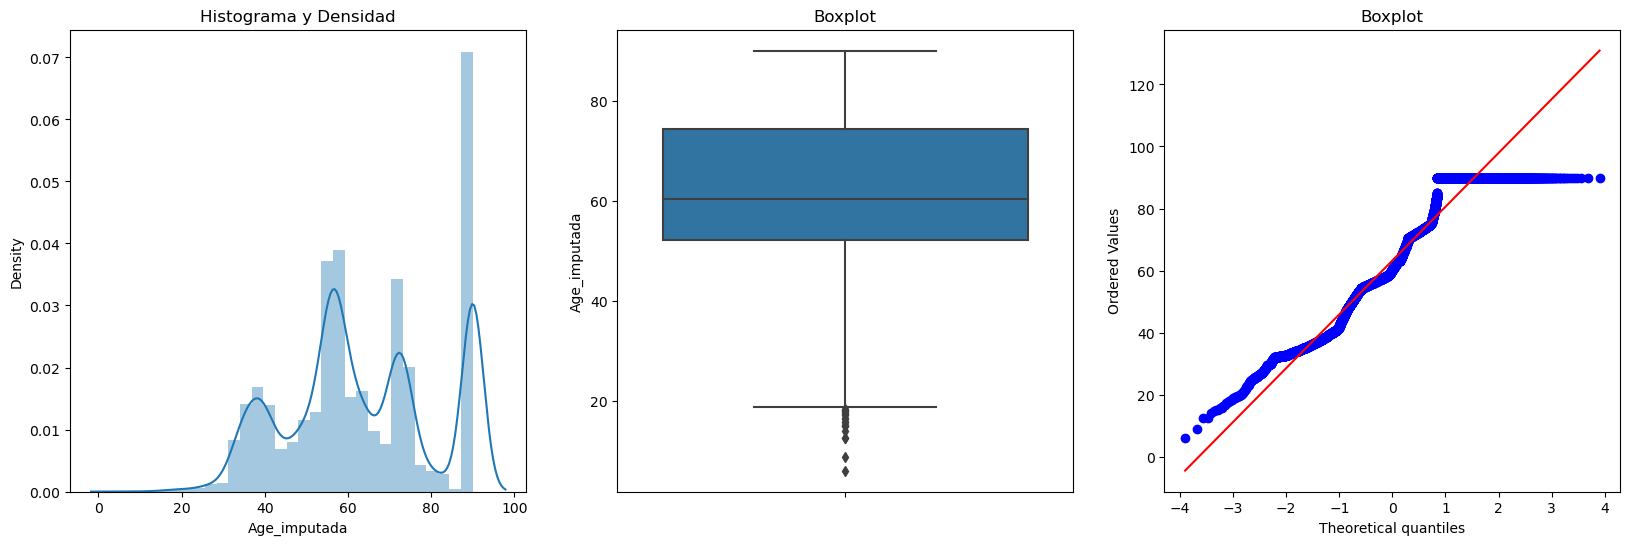

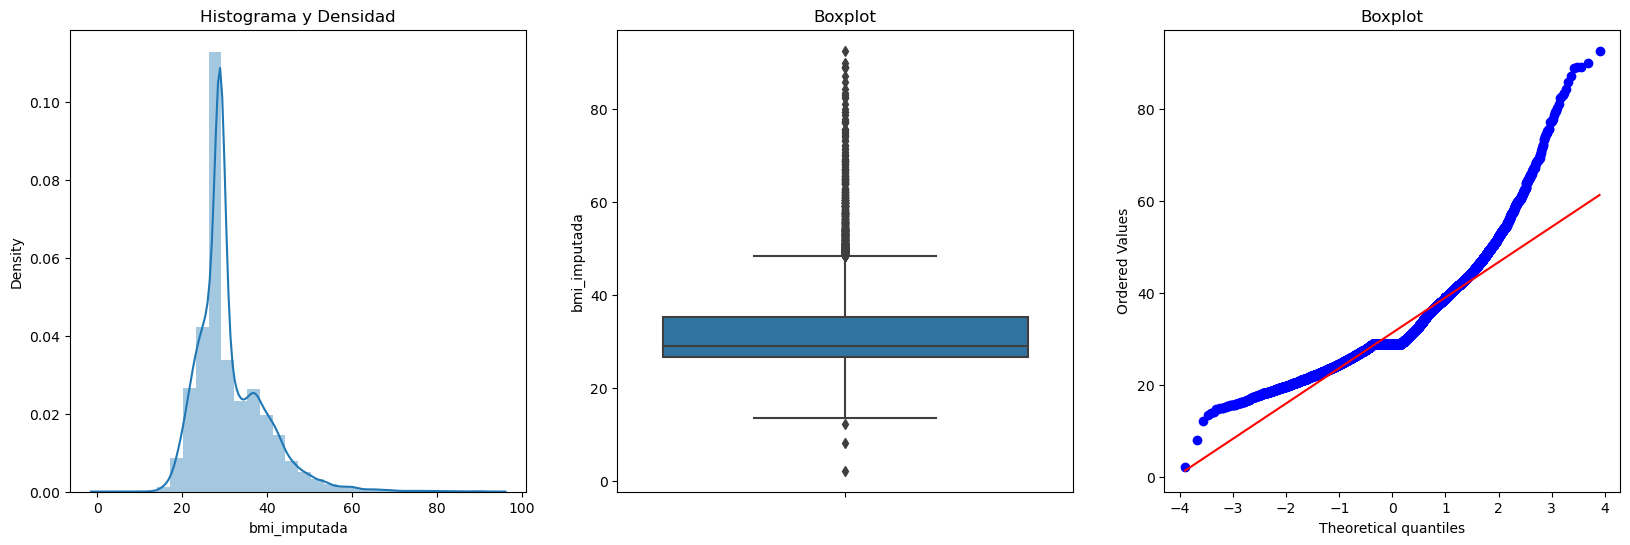

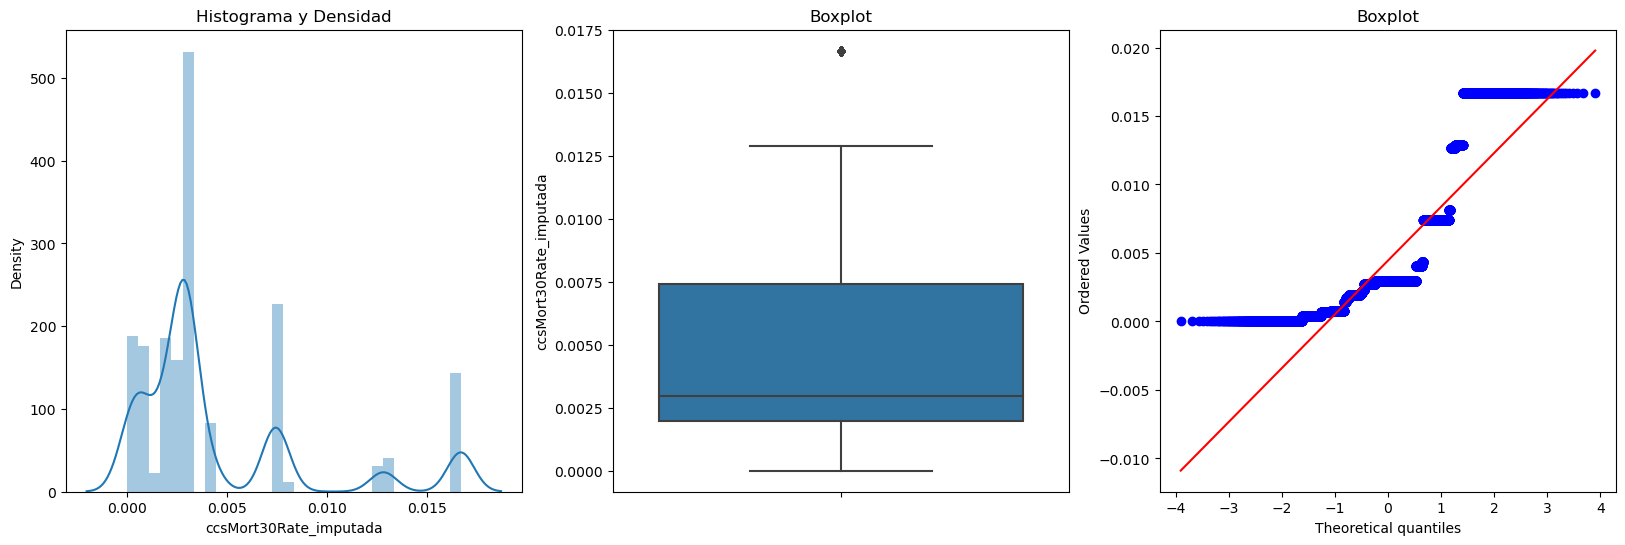

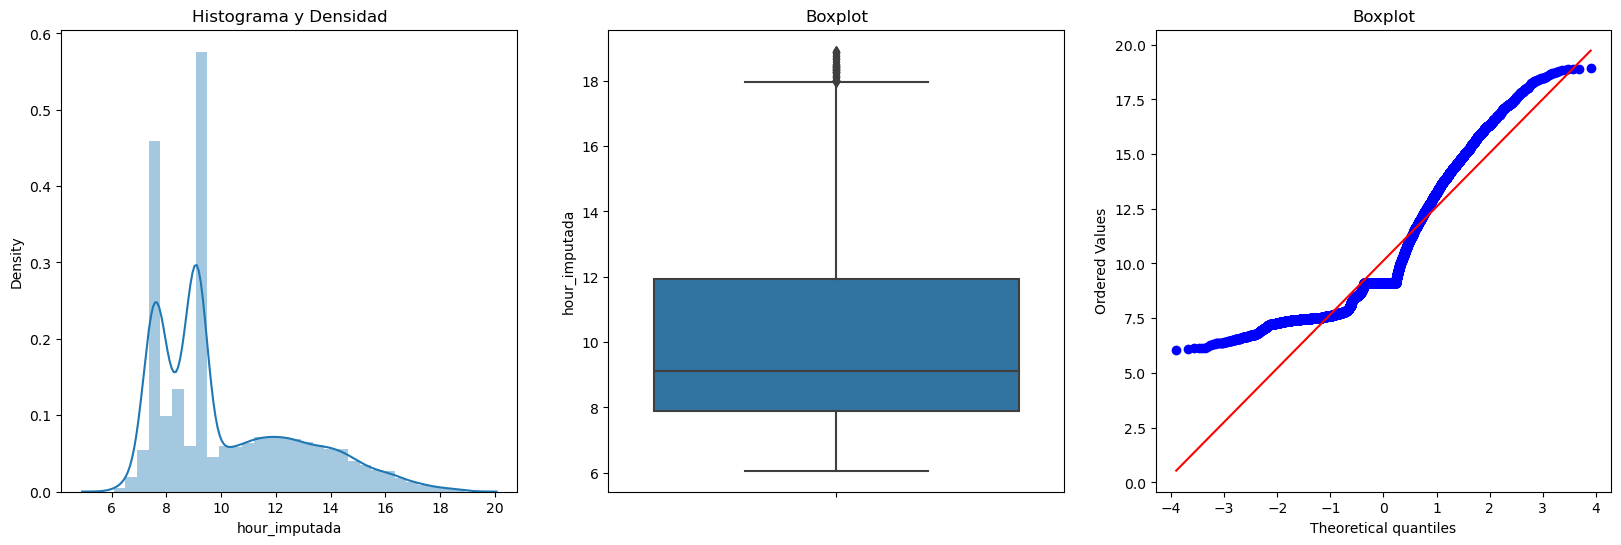

In [25]:
for col in continuas: 
    plotDistBoxQQ(df,col)

In [26]:
## Creamos función para calcular el IQR, Limite inferior y limite superior. 

dataset = df
col = 'bmi' 
def detectOutliersLimits(dataset,col):
    '''
    Descripción: Calcula los limites superiores e inferiores para detección de outliers. 
    Input: dataset->pandas dataframe, col->string nombre de columna
    Output: tupla de floats con los limites superior e inferior (LI,LS)
    '''
    IQR = dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)
    
    return LI,LS


#### Capping

In [27]:
def cappingContinuas(dataset):
    '''
    Descripción: Aplica capping a las variables continuas  y convierte los valores negativos a cero
    Input: dataset -> pandas dataframe
    Output: pandas dataframe con las variables continuas cappeadas y valores negativos convertidos a cero
    '''
    continuas, _, _ = getDataColTypes(dataset)
    for col in continuas:
        LI, LS = detectOutliersLimits(dataset, col)
        dataset[col] = np.where(dataset[col] > LS, LS,
                                np.where(dataset[col] < LI, LI, dataset[col]))
        dataset[col] = np.where(dataset[col] < 0, 0, dataset[col])  # Convertir valores negativos a cero. 
    return dataset

In [28]:
df_capped = cappingContinuas(df)


C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

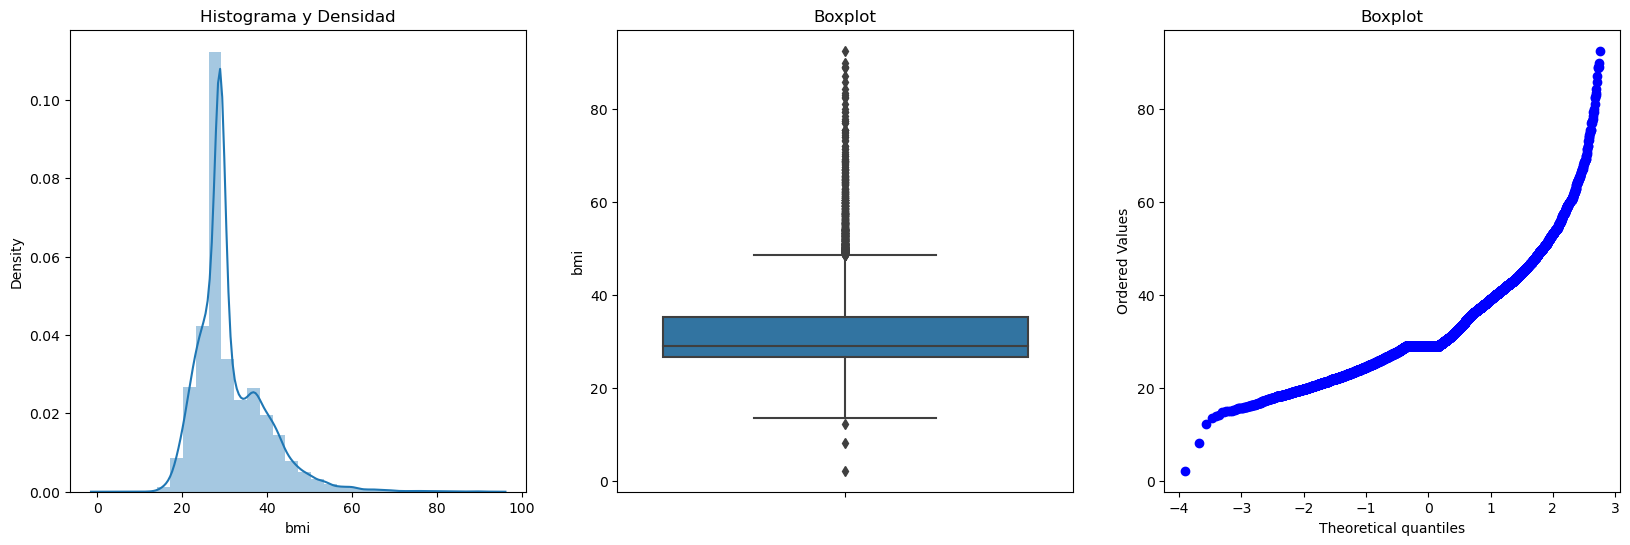

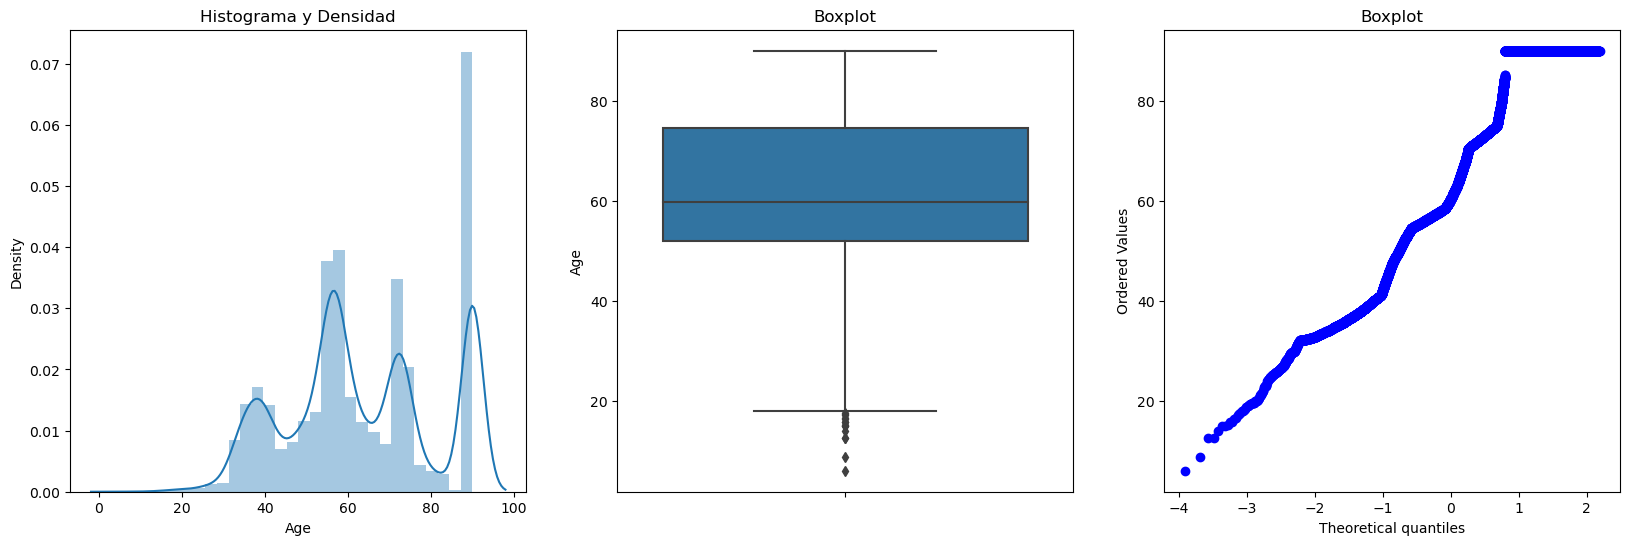

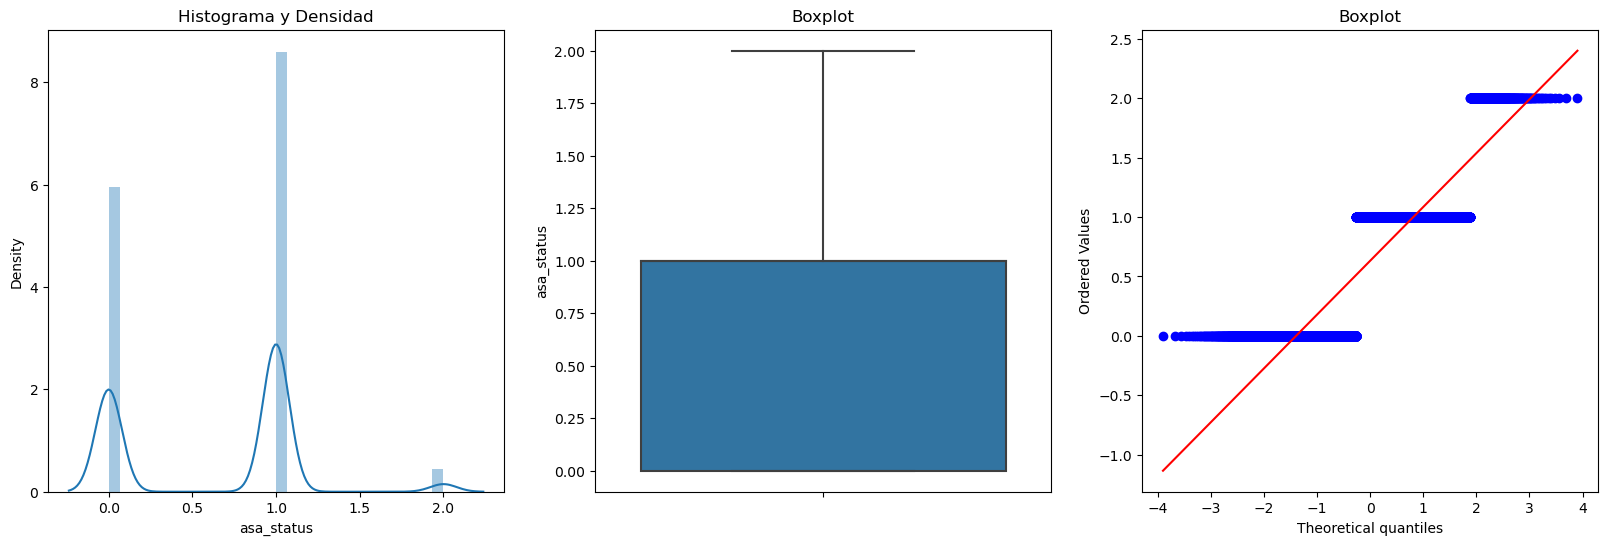

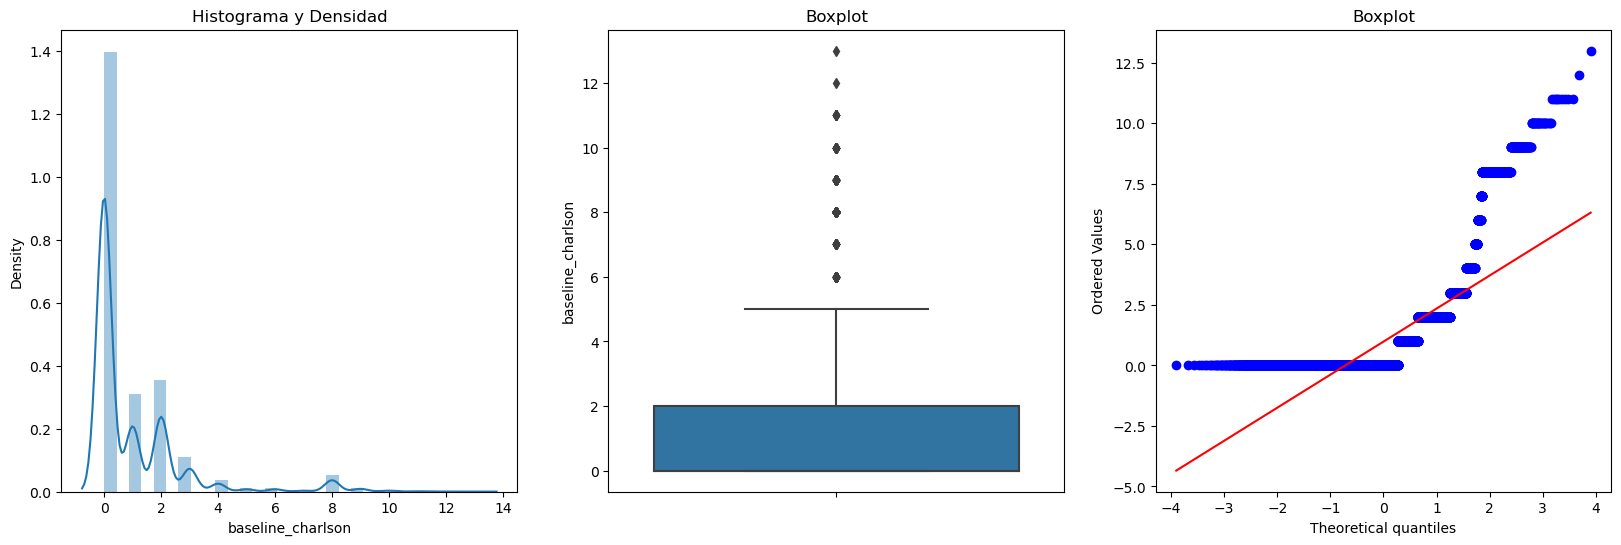

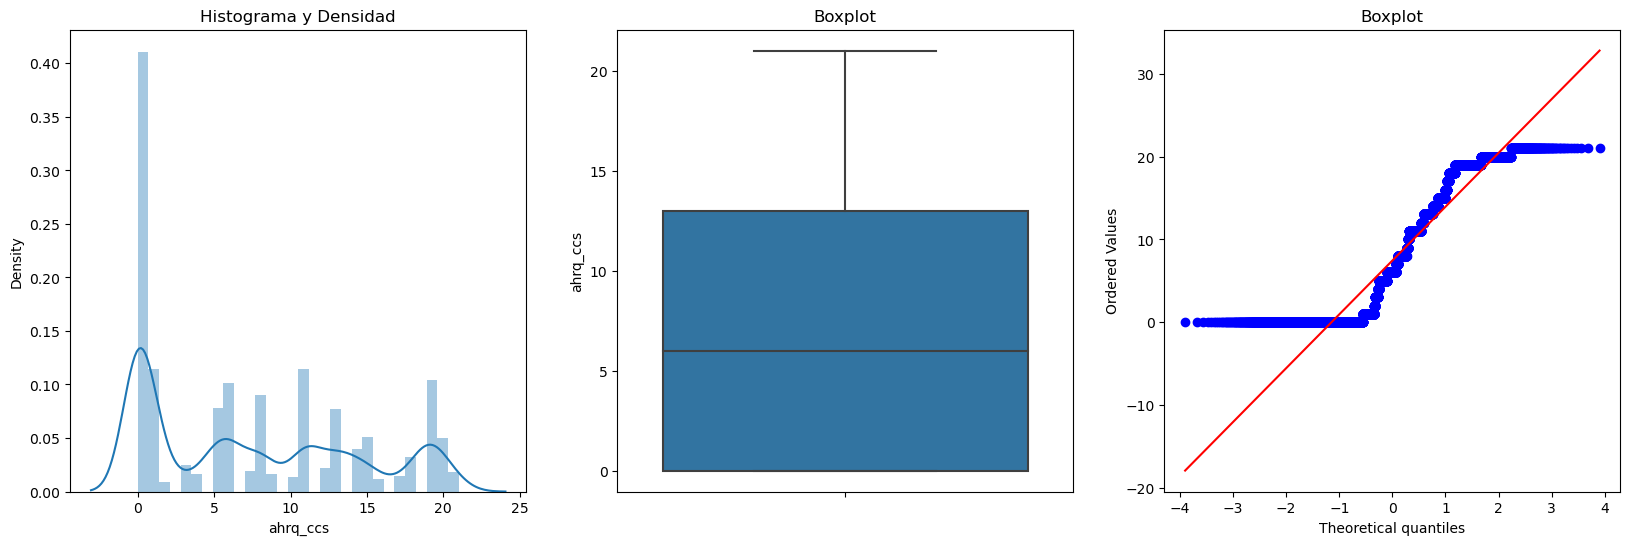

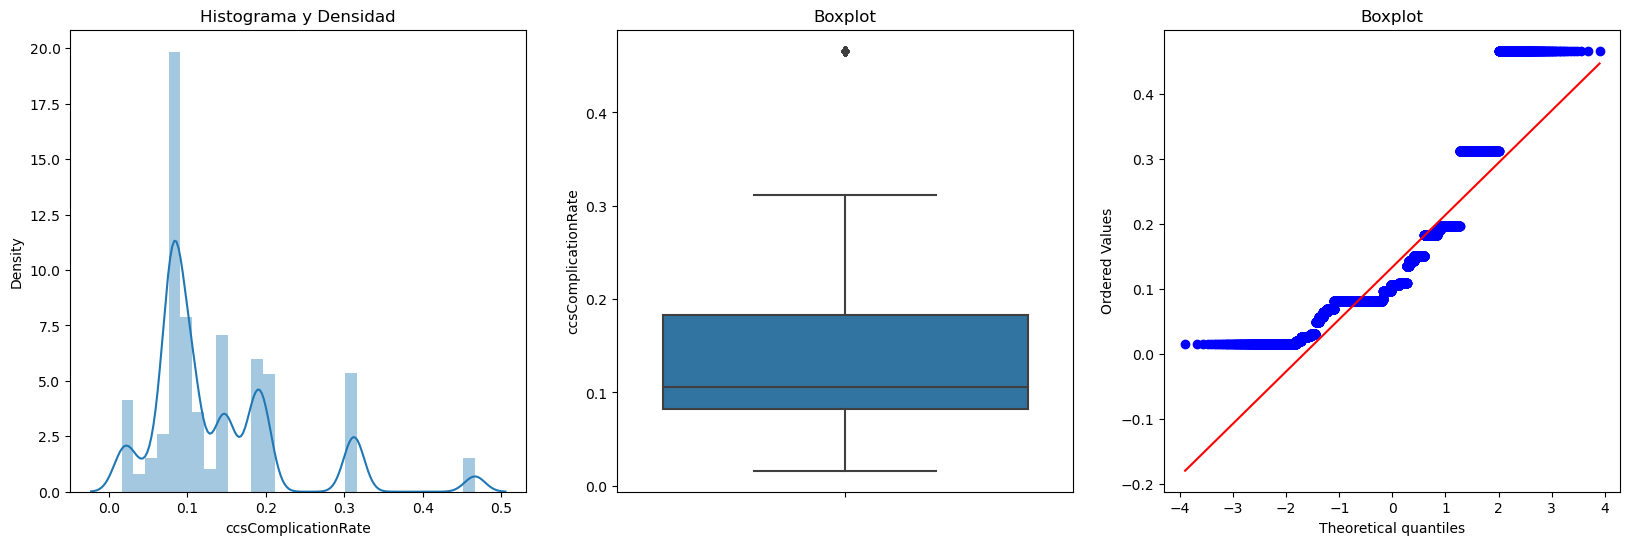

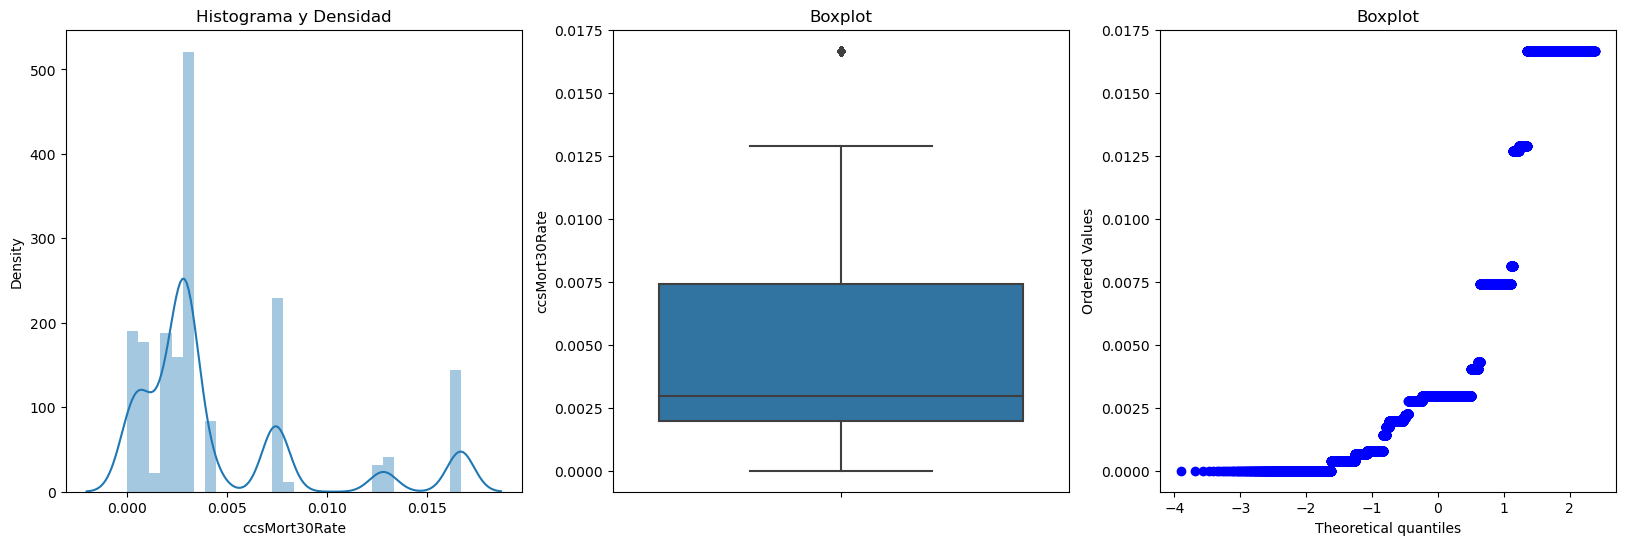

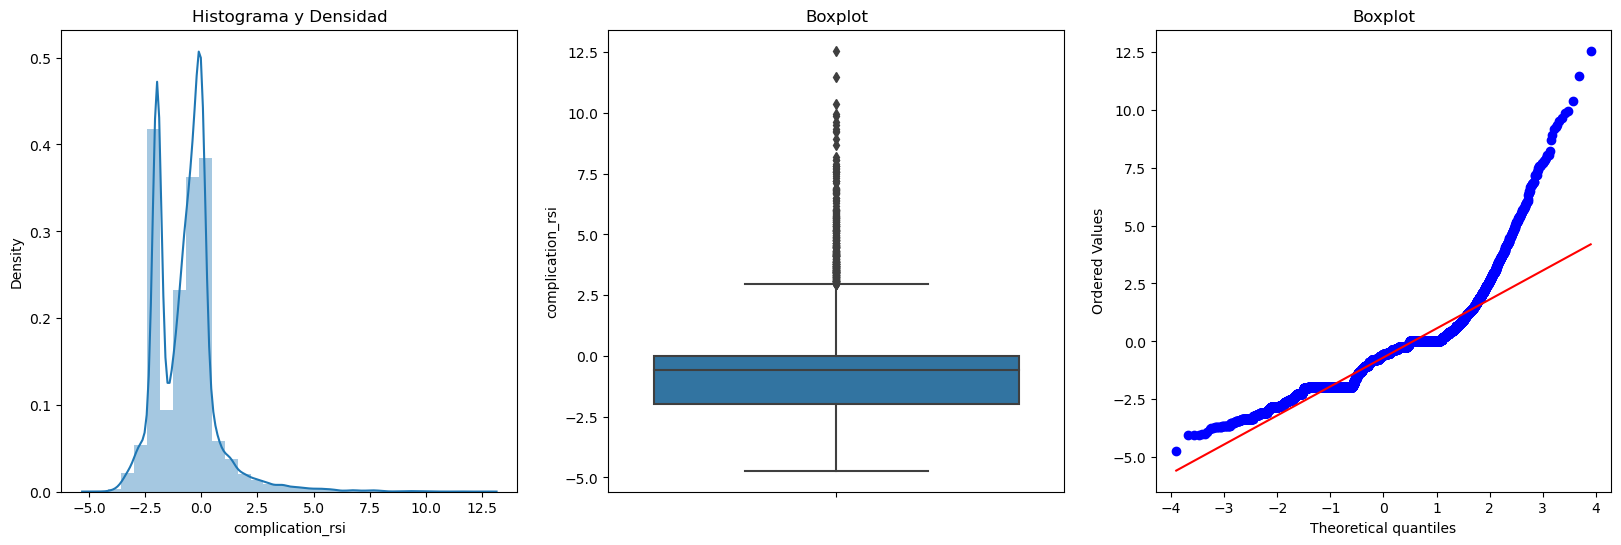

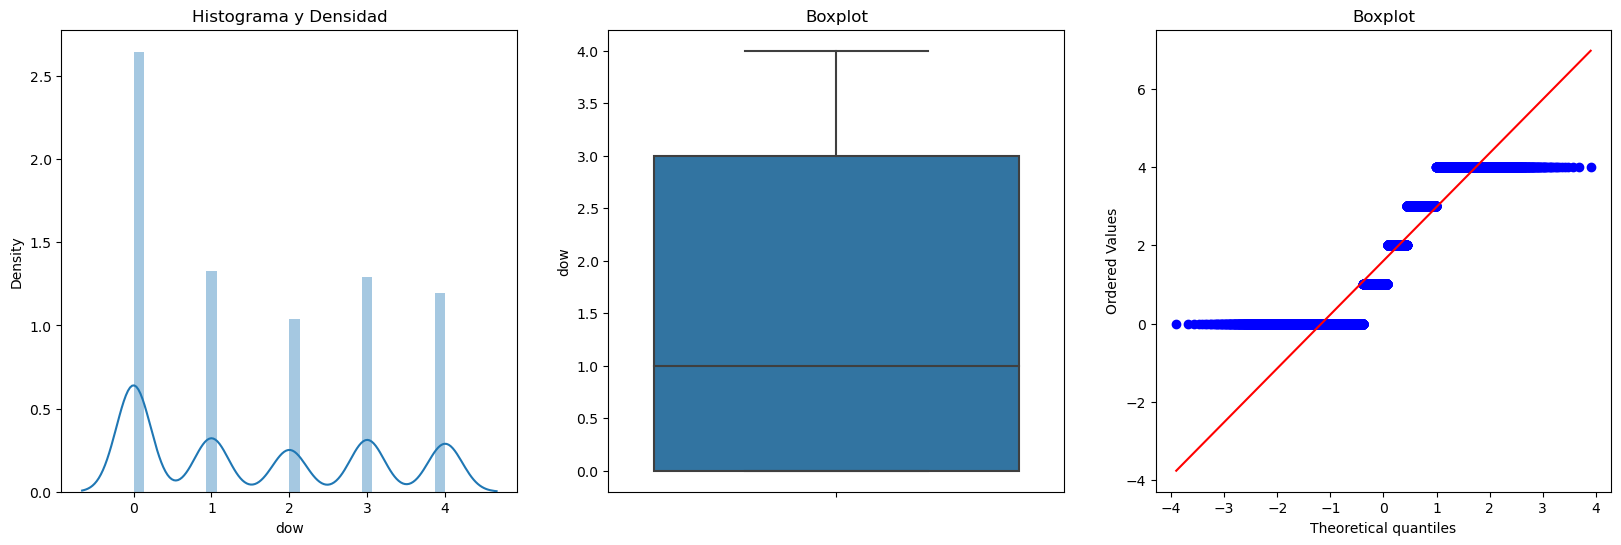

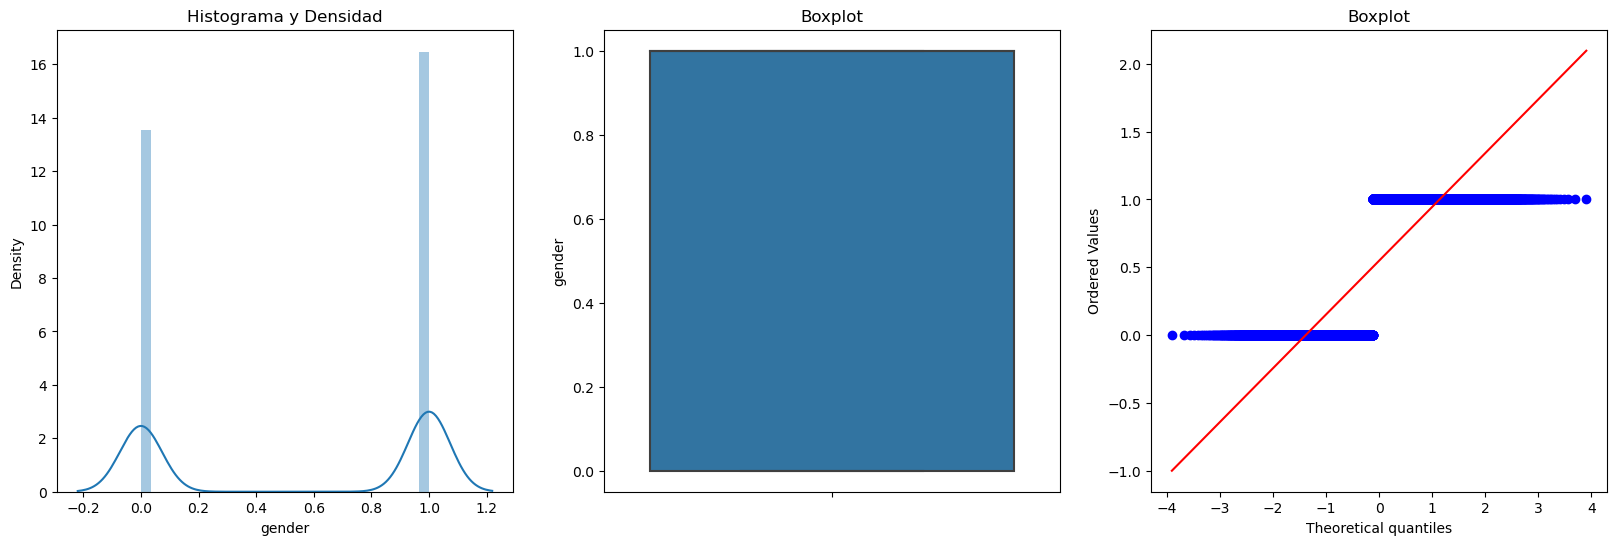

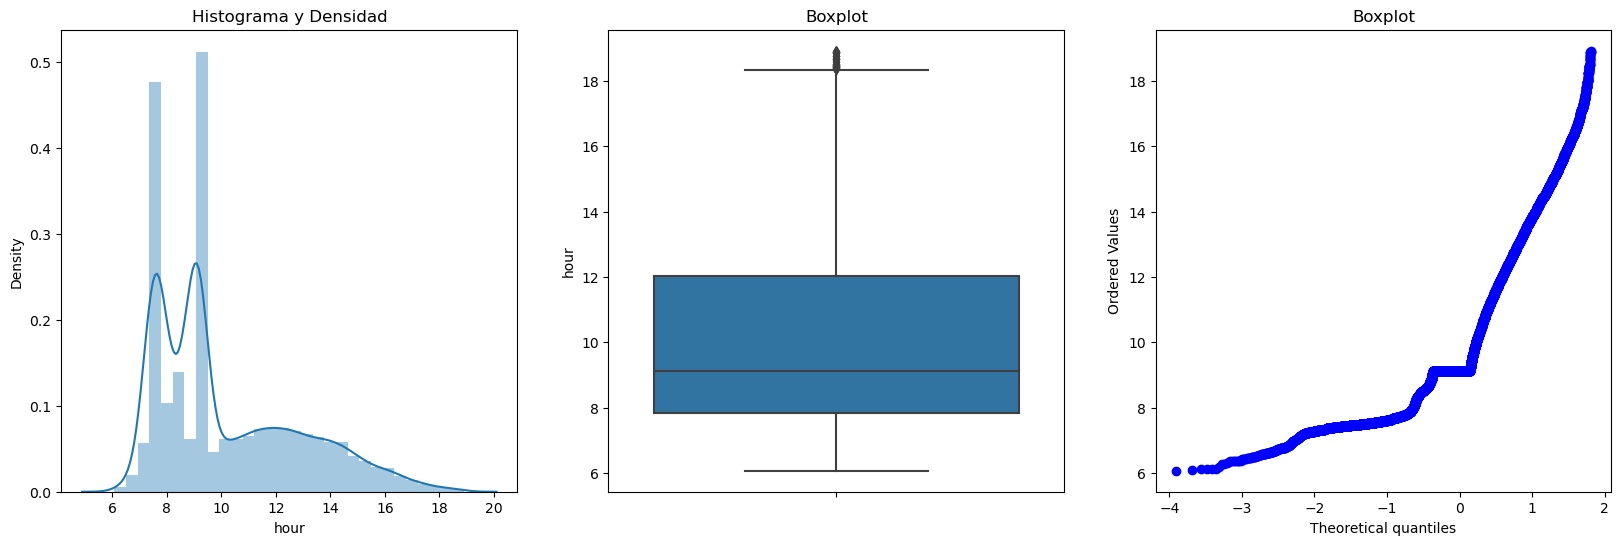

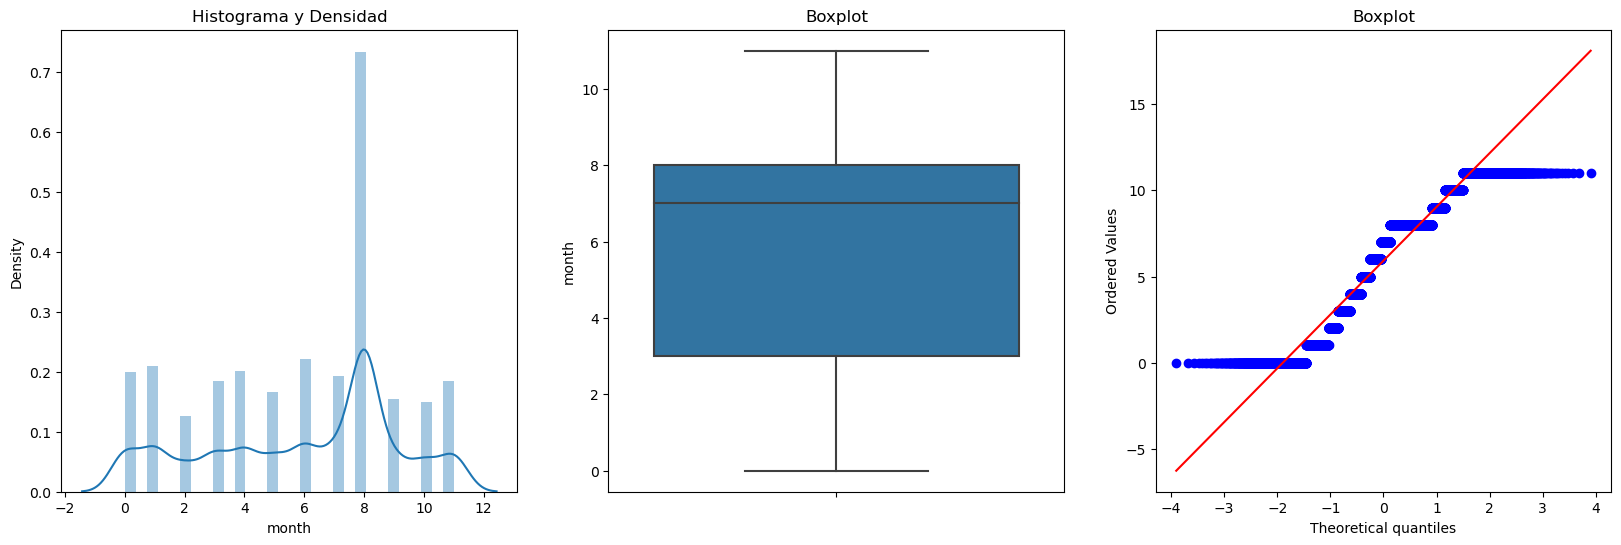

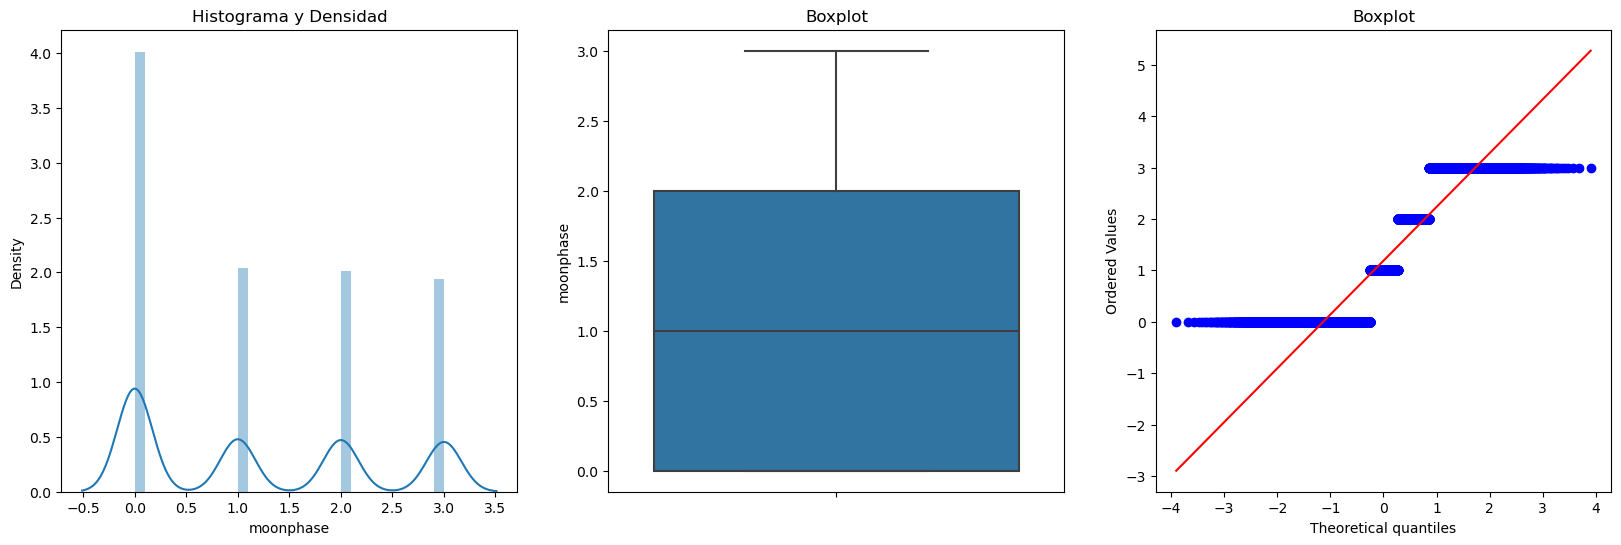

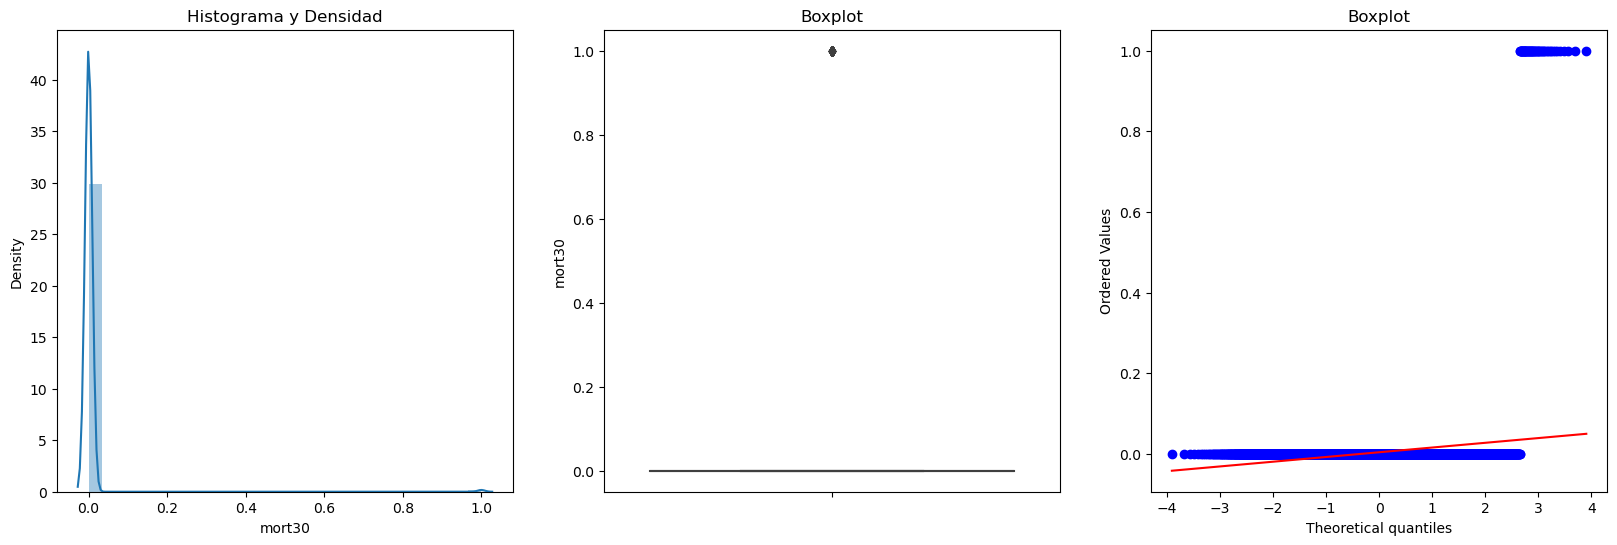

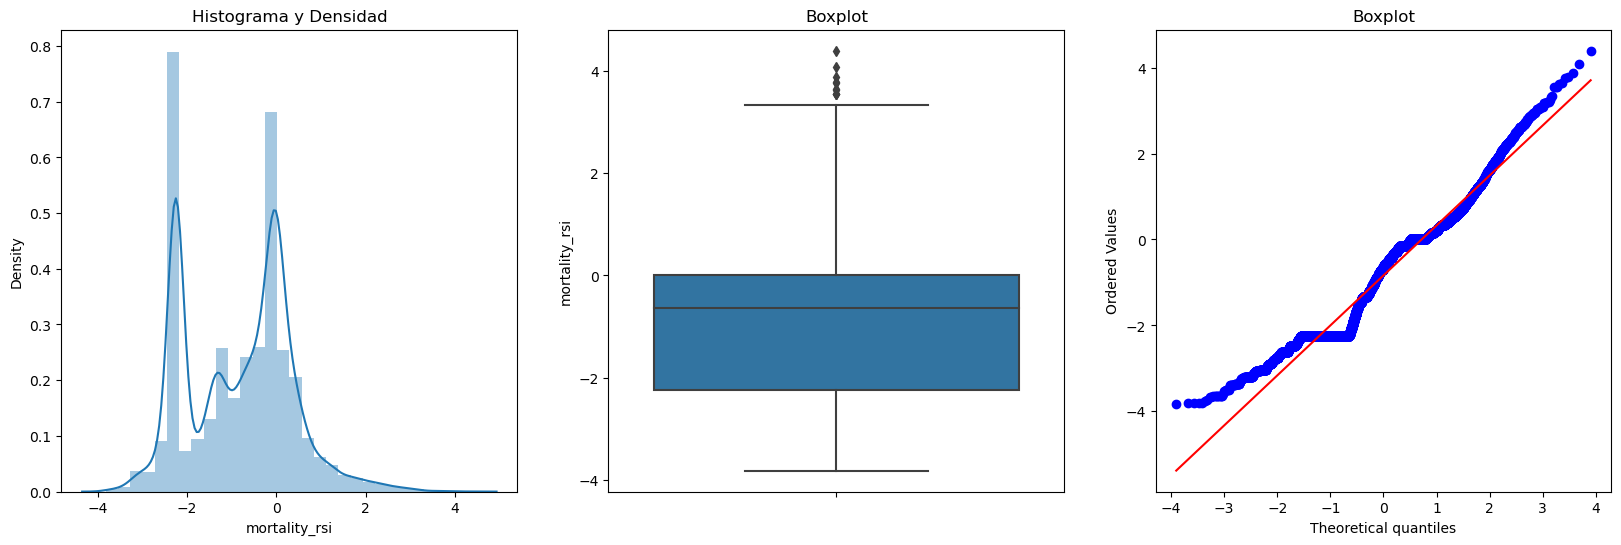

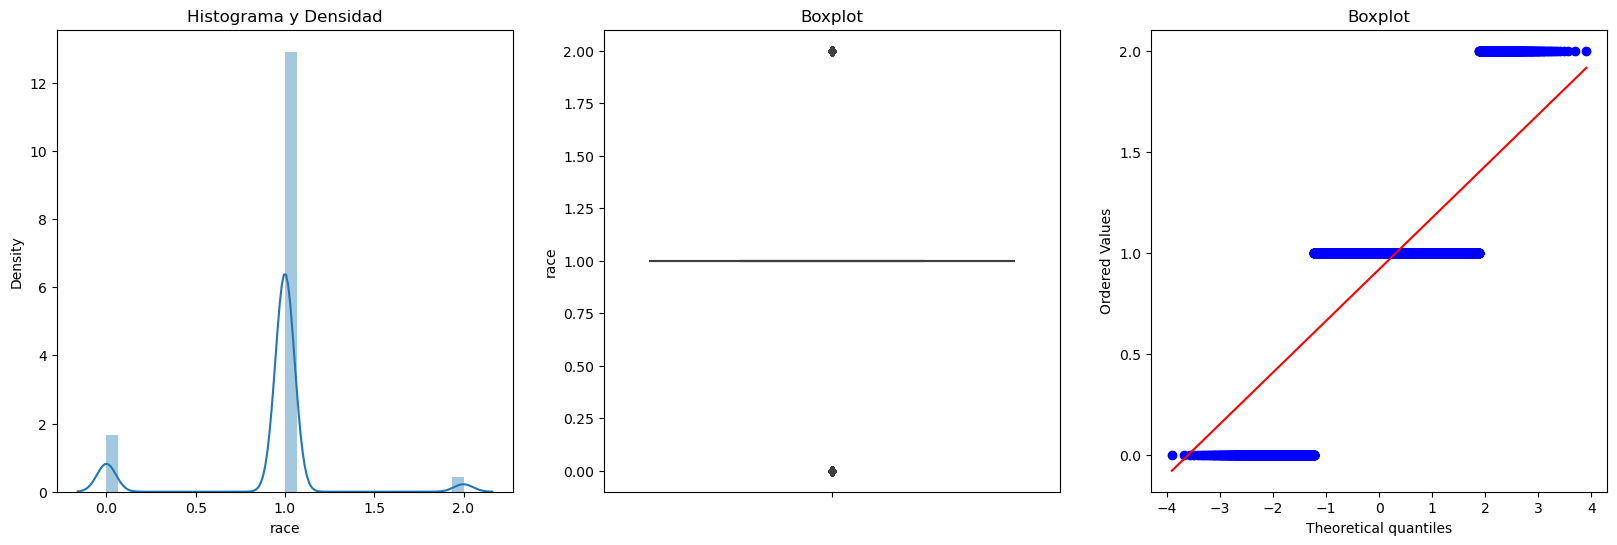

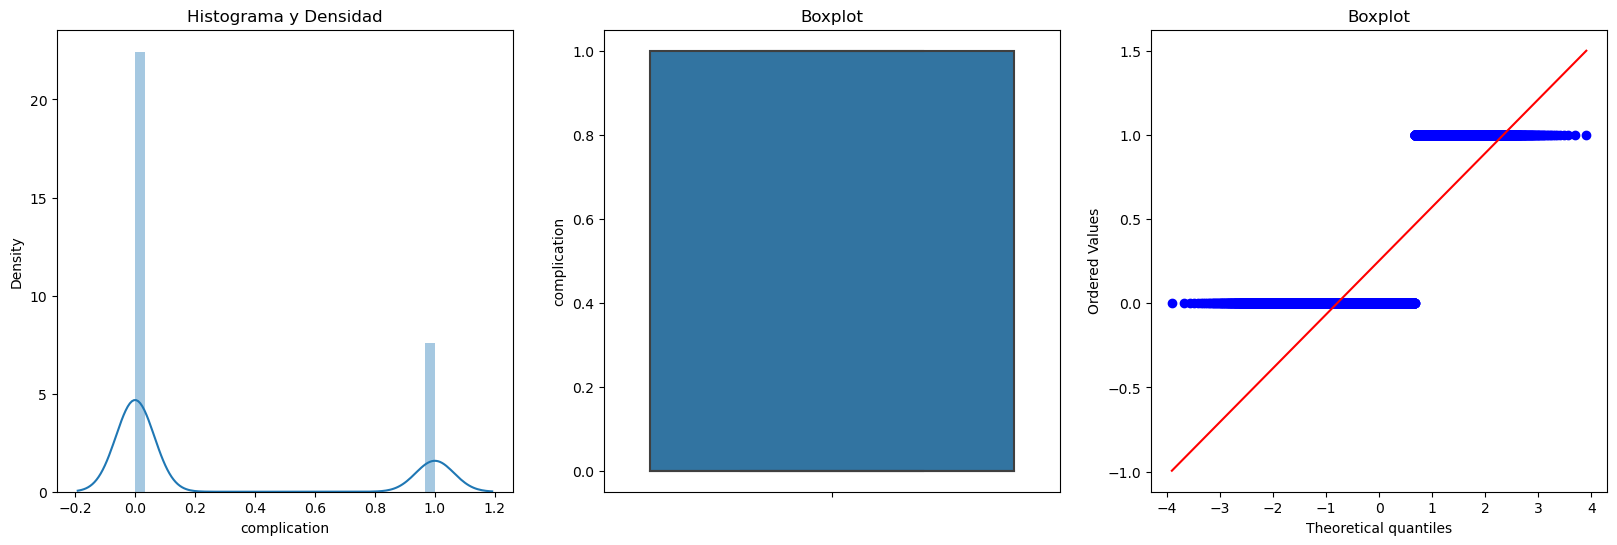

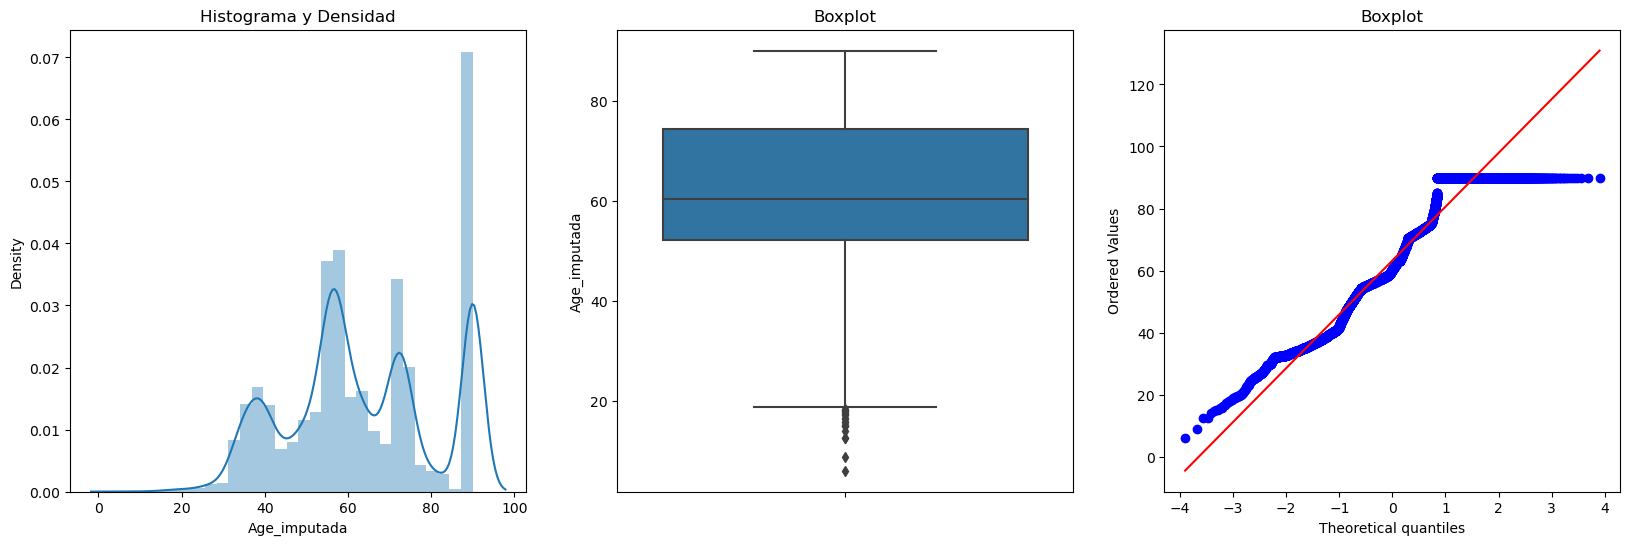

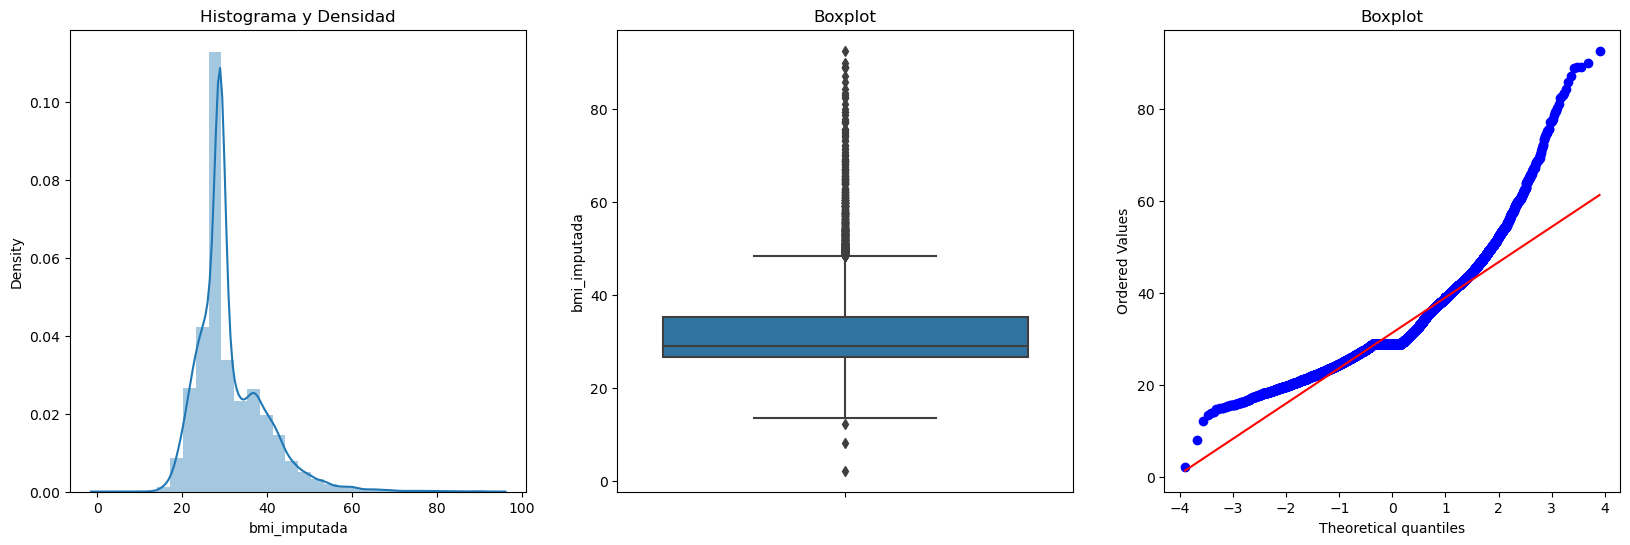

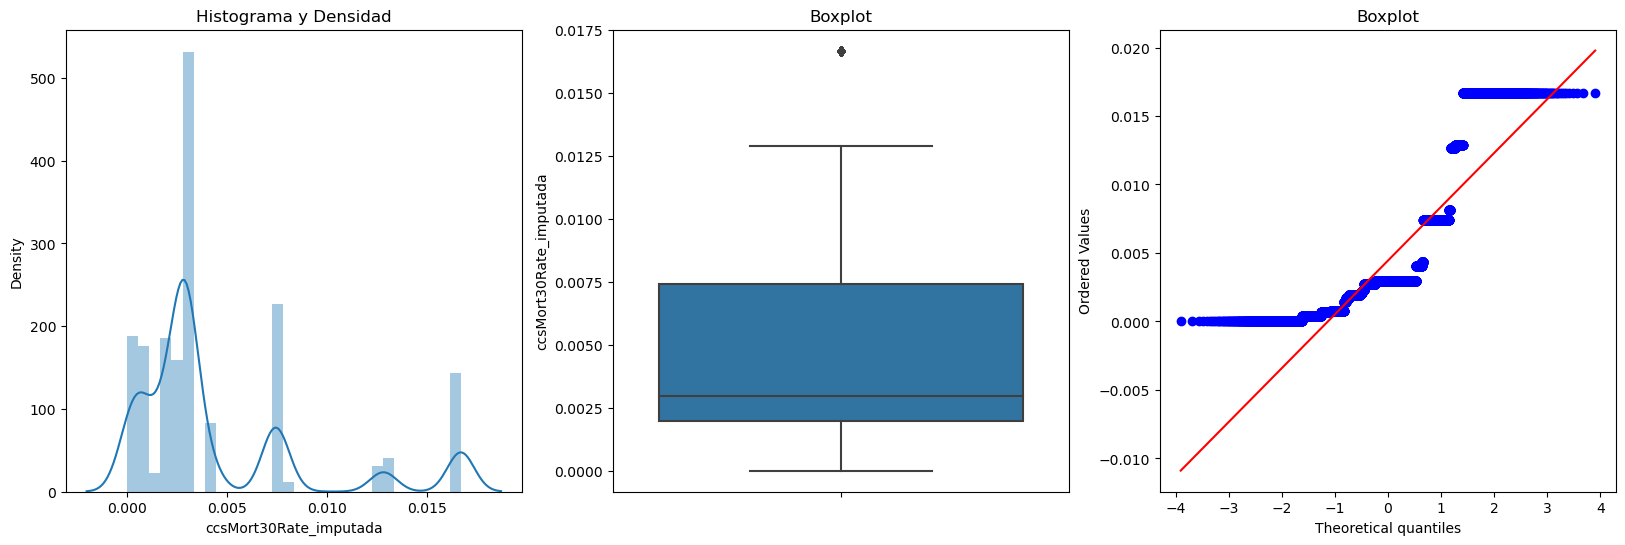

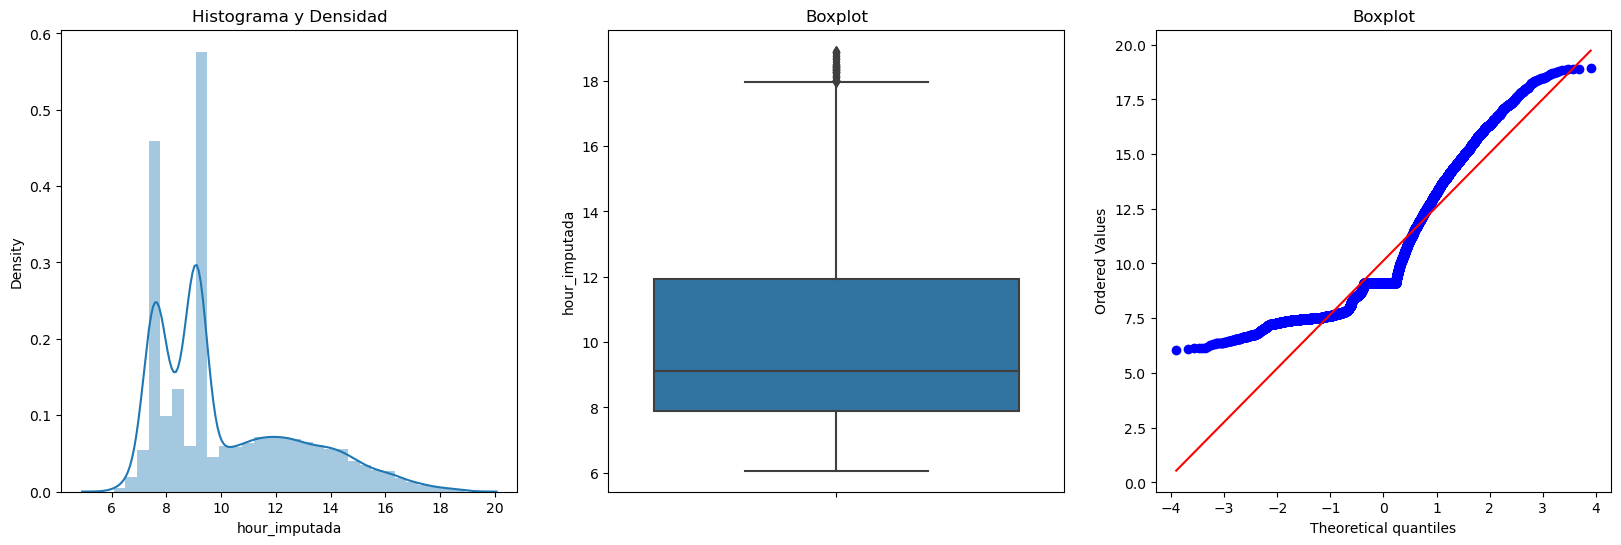

In [29]:
for col in continuas: 
    plotDistBoxQQ(df,col)

### 2. Balanceo de Datos 

In [30]:
df['complication'].value_counts()

0    10945
1     3690
Name: complication, dtype: int64

In [31]:
df_uno=df[df['complication']==1]
df_uno.shape

(3690, 29)

In [32]:
df_cero=df[df['complication']==0]
df_cero.shape

(10945, 29)

In [33]:
cantidaduno=2*df_uno.shape[0]
cantidaduno

7380

In [34]:
df_uno = df_uno.sample(n=cantidaduno, replace=True, random_state=2023)


In [35]:
df=pd.concat([df_cero,df_uno])
df.shape

(18325, 29)